<h1><center>Банки — Сегментация пользователей по потреблению</center></h1>

<a id=0 ></a>

# Введение

За последние месяцы региональный банк 'Метанпромбанк', располагающийся в
Ярославле и областных городах: Ростов Великий и Рыбинск, столкнулся с трудностями в борьбе за клиентов. Наблюдается значительный отток клиентов из банка.
Мы получили запрос на помощь в выявлении потенциальных сегментов, на которые стоит направить усилия, для сокращения оттока клиентов.

Цель:

Уменьшение оттока клиентов из банка.

Задача:

Анализ клиентов и их сегментация для выявлении потенциальных сегментов, на которые стоит направить усилия, чтобы сократить отток клиентов:

Оглавление.
- 1 [Декомпозиция](#1);
- 2 [Загрузка и подготовка данных к анализу](#2.1);
    - 2.1 [Загрузка данных](#2.1);
    - 2.2 [Предобработка данных](#2.2.1);
        - 2.2.1 [Приведение к змеинному стилю, изменение типа данных](#2.2.1);
        - 2.2.2 [Проверка на наличие дубликатов](#2.2.2);
        - 2.2.3 [Проверка наличия аномальных значений](#2.2.3.1);
            - 2.2.3.1 [Столбец `score`](#2.2.3.1);
            - 2.2.3.2 [Столбец `age`](#2.2.3.2);
            - 2.2.3.3 [Столбец `balance`](#2.2.3.3);
            - 2.2.3.4 [Столбец `est_salary`](#2.2.3.4);
            - 2.2.3.5 [Столбец `equity`](#2.2..3.5);
            - 2.2.3.6 [Столбец `products`](#2.2.3.6);
        - 2.2.4 [Обработка пропусков](#2.2.4.1);
            - 2.2.4.1 [Пропуски в столбце `balance`](#2.2.4.1);
            - 2.2.4.2 [Пропуски в столбце `age`](#2.2.4.2);
        - 2.2.5 [Добавление новых столбцов](#2.2.5);
- 3 [Исследовательский анализ данных](#3.1);
    - 3.1 [Исследование оттока клиентов вразрезе имеющихся признаков](#3.1);
    - 3.2 [Относительные значения в категориальных признаках](#3.2);
    - 3.3 [Изучение распределения непрерывных величин](#3.3);
    - 3.4 [Корреляционный анализ признаков относительно признака оттока](#3.4);
- 4 [Проверка статистических гипотез](#4.1);
    - 4.1 [Проверка гипотезы разичия возраста клиентов использующих один и два продукта банка](#4.1);
    - 4.2 [Проверка гипотезы различия среднего баланса на счёте клиентов](#4.2);
    - 4.3 [Проерка равенства долей](#4.3);
- 5 [Промежуточный вывод](#5);
- 6 [Сегментация клиентов](#6);
- 7 [Вывод](#7)

Ссылка на презентацию: https://drive.google.com/file/d/1LkaN6gFCUUyye4d0I1w6M6zw2-PjX3Tp/view?usp=sharing

<a id=1 ><a/>

## Декомпозиция

1. Загрузка данных и подготовка их для исследования:
- загрузка и первичный осмотр данных;
- редактирование оформления датафрейма (приведение названий столбцов к змеинному стилю), изменение типов данных, если требуется;
- проверка наличия явных и неявных дубликатов;
- обработка аномальных значений;
- обработка пропусков, удаление, заполнение на основе имеющихся данных ___или оставление бех изменений___;
- преобразования столбцов (изменение текстового формата на числовой, если требуется) и добавление новых столбцов если требуется для выполнения поставленной задачи.

2. Исследовательский анализ данных:
- изучение оносительных значения в имеющихся категориях;
- сравнение портретов типичных клиентов по известным признакам (медианы, среднее);
- изучение распределения непрерывных величин, визуализация с использованием графиков;
- ___исследование оттока клиентов в разрезе имеющихся признаков и/или диапазовнов значений признаков;___
- корреляционный анализ признаков относительно признака оттока клиентов.

3. Провека статистичческих гипотез.
- выбор и обоснование статистической гипотезы на основе данных полученных в исследовательском анализе;
- выбор подходящего теста для проверки поставленной гипотезы;
- формулировка нулевой и альтрнативной гипотезы;
- проверика статистическую гипотезу на основе выбранного теста, вывод на основе её результатов.

4. Промежуточный вывод на основе проведенного исследовательского анализа данных и результатов статистических гипотез. Выделение признаков наиболее сильно вляющих на отток клиентов.

5. Сегментация клиентов на основе выделенных признаков. ___Исследовать полученные сегменты на долю оттока, их размер и признаки клиентов в сегментах. Приоритезировать полученные сегменты по оттоку клиентов, выбрать потенциальные сегменты по которым можно уменьшить уровень оттока клиентов.___

6. Создание презентации по полученным данным. Выводы и рекомендации для заказчика.

[К оглавлению](#0)

<a id=2.1 ><a/>

## Загрузка и подготовка данных к анализу

### Загрузка данных

Загрузим требуемыы библиотеки

In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mth

In [2]:
try:
    import phik
except:
    !pip install phik

from phik.report import plot_correlation_matrix

Загрузим данные

In [3]:
df = pd.read_csv('C:/Users/RA/Documents/practicum/Portfolio/datasets/bank_scrooge.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Получена таблица с 12 столбцами и 10000 строками, где:
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

In [6]:
df.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

В таблице присутствуют пропуски, в столбце `age` 26 пропусков и в столбце `balance` 2295 пропусков. Решение по ним примем [в соответствующем разделе.](#2.2.4)

[К оглавлению](#0)

<a id=2.2.1 ><a/>

### Предобработка данных

#### Приведение к змеинному стилю, изменение типа данных

Приведём названия столбцов к змеинному стилю, и сократим название столбца `last_activity`

In [7]:
df.rename(columns={'USERID': 'user_id', 'last_activity': 'activity', 'EST_SALARY': 'est_salary'}, inplace=True)

Изменим значения в столбце `gender` на числовой, для `Ж` - 0, для `М` - 1.

In [8]:
df['gender'].replace(['Ж','М'], [0, 1], inplace = True)

Проверим есть ли дробная числа в столбце `score`

In [9]:
df.loc[(df['score'] % 2 != 1) & (df['score'] % 2 != 0)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn


Дробные числа в столбце `score` отсутствуют. Изменим тип данных в этом столбце на целочисленный 

In [10]:
df['score'] = df['score'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      10000 non-null  int64  
 1   score        10000 non-null  int64  
 2   city         10000 non-null  object 
 3   gender       10000 non-null  int64  
 4   age          9974 non-null   float64
 5   equity       10000 non-null  int64  
 6   balance      7705 non-null   float64
 7   products     10000 non-null  int64  
 8   credit_card  10000 non-null  int64  
 9   activity     10000 non-null  int64  
 10  est_salary   10000 non-null  float64
 11  churn        10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


[К оглавлению](#0)

<a id=2.2.2 ><a/>

#### Проверка на наличие дубликатов

In [11]:
print('Количетсво явных дубликатов:', df.duplicated().sum())
print('Количество явных дубликатов по ключевому столбцу:', df[['user_id']].duplicated().sum())

Количетсво явных дубликатов: 0
Количество явных дубликатов по ключевому столбцу: 73


In [12]:
 df[df[['user_id']].duplicated(keep=False)].head(20).sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn
1411,123461,829,Ярославль,0,59.0,0,96222.44,2,0,1,102771.55,1
904,131419,934,Ярославль,1,35.0,5,2348335.95,2,0,0,217105.13,1
946,149365,877,Ярославль,1,41.0,5,819182.01,2,0,0,212316.47,1
690,152479,768,Рыбинск,0,42.0,0,126787.79,4,1,1,143233.23,1
1080,155872,896,Ярославль,1,36.0,3,1113656.92,3,0,1,291176.85,1
58,164676,860,Ярославль,1,37.0,5,648594.03,2,1,1,213586.86,1
790,170312,901,Ярославль,1,33.0,4,3276783.93,3,0,1,358700.96,1
150,185748,850,Рыбинск,1,36.0,5,1203376.67,2,0,1,89401.82,1
918,187635,918,Ярославль,0,44.0,0,NaN,1,1,1,162497.52,0
231,190253,823,Рыбинск,1,37.0,4,373348.39,2,0,1,131947.92,1


Известно, что у каждого отделения банка своя отдельная база клиентов, следовательно возможны дубликаты в столбце `user_id`, проверим, есть ли дубликаты с учётом города.

In [13]:
 df[df[['user_id', 'city']].duplicated()].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn


Дубликатов в ID клиентов по городам не обнаружено, следовательно это разные клиенты. Так как для маркетинговых целей нам необходимо знать реальный ID климента, то оставим колонку `useer_id` без изменений, но при необходимости, построении графиков, использум индексы вместо `user_id`. 

Проверим начилие неявных дубликатов в категориальных и биyарных столбцах.

In [14]:
display(df['city'].unique(), df['gender'].unique(), df['credit_card'].unique(), df['activity'].unique(), df['churn'].unique())

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

Неявных дубликатов не обнаружено.

[К оглавлению](#0)

<a id=2.2.3.1 ><a/>

#### Проверка наличия аномальных значений

##### Столбцец `score`

Проверим наличие аномальных значений в столбце `score`

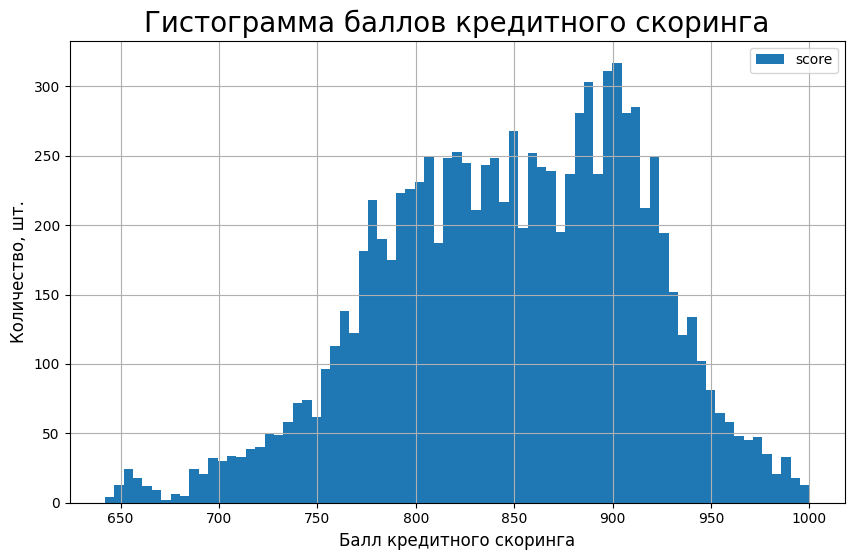

In [15]:
df.plot(
    y='score',
    kind='hist',
    bins=75,
    grid=True,
    figsize=(10, 6)
)
plt.title('Гистограмма баллов кредитного скоринга', fontsize=20)
plt.ylabel('Количество, шт.', fontsize=12)
plt.xlabel('Балл кредитного скоринга', fontsize=12);

Большая доля клиентов имеет балл кредитного скоринга в районе 900 баллов. Края гистограммы близки к нормальному распределению за исключением небольшого пика возле значения 650 баллов.  Вероятно, это обусловленно особенностями подсчёта баллов, но так как все  значения входят в диапазлн шакалы баллов кредитного скоринга оставим их в датасете.

[К оглавлению](#0)

<a id=2.2.3.2 ><a/>

##### Столбцец `age`

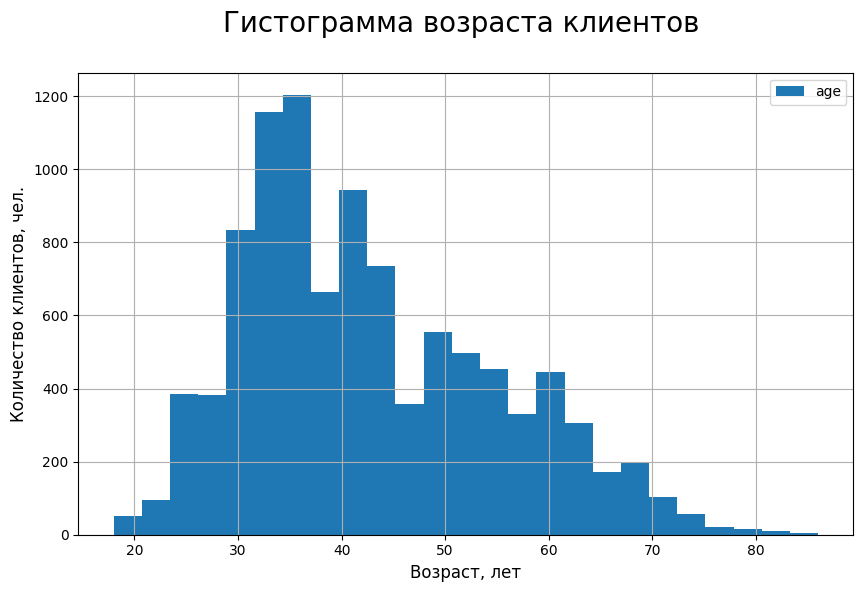

In [16]:
df.plot(
    x='user_id',
    y='age',
    kind='hist',
    bins=25,
    grid=True,
    figsize=(10, 6)
)
plt.title('Гистограмма возраста клиентов \n', fontsize=20)
plt.ylabel('Количество клиентов, чел.', fontsize=12)
plt.xlabel('Возраст, лет', fontsize=12);

Напишем функцию для построения графиков перцентилей от 0% до 10% и от 90% до 100%

In [17]:
def percentile (data, column, step = 0.2):
    #Расчёт перцентилей и количества клиентов со значением выбранного столбца больше или равное значению перцентилюя
    percentile_up = []
    count_up = []
    percentile_range_up = np.arange(90, 100, step)
    
    for i in percentile_range_up:
        percentile_up.append(round(np.percentile(data.loc[data[column] > 0][column], [i])[0], 2))
        
    for i in percentile_up:
        count_up.append(data.loc[data[column] >= i][column].count())
        
    percentile_up_df = pd.DataFrame({'percentile_range': percentile_range_up,'percentile_values': percentile_up,
                                      'cnt_values': count_up})

    #Построение графиков
    fig, ax = plt.subplots(figsize=(15, 5))
    ax1 = ax.twinx()
    #График значений перцентиля
    ax.plot(
        percentile_up_df['percentile_range'], 
        percentile_up_df['percentile_values'],
        color='r',
        marker='o',
        label='Значение перцентиля',
        alpha=0.7
    )
    #График количества клиентов
    ax1.plot(

        percentile_up_df['percentile_range'],
        percentile_up_df['cnt_values'],
        marker='o',
        label=f'Количество клиентов с значением в {column} >= значения перцентиля',
        alpha=0.7
    )
    #Оформление    
    ax.legend(loc=(0, -0.16))
    ax1.legend(loc=(0.2,-0.16))
    ax.grid(True)
    ax.set_xticks(
                  np.arange(percentile_up_df['percentile_range'].min(),
                  percentile_up_df['percentile_range'].max() + 1,
                  0.5)
                  , minor=False)
    ax.set_title(f'Перцентили (выше 90%) по столбцу {column}\n', fontsize=20)
    ax.set_ylabel(f'Значения {column}', fontsize=12)
    ax1.set_ylabel('Количество клиентов', fontsize=12)
    ax.set_xlabel(' \n \nПерцентиль, %', fontsize=12)
    fig.show();

    #Расчёт перцентилей и количества клиентов со значением выбранного столбца меньше или равное значению перцентилюя
    percentile_low = []
    count_low = []
    percentile_range_low = np.arange(0, 10, step)
    
    for i in percentile_range_low:
        percentile_low.append(round(np.percentile(data.loc[data[column] > 0][column], [i])[0], 2))
        
    for i in percentile_low:
        count_low.append(data.loc[data[column] <= i][column].count())
        
    percentile_low_df = pd.DataFrame({'percentile_range': percentile_range_low,'percentile_values': percentile_low,
                                      'cnt_values': count_low})

    #Построение графиков
    fig, ax = plt.subplots(figsize=(15, 5))
    ax1 = ax.twinx()
    #График значений перцентиля
    ax.plot(
        percentile_low_df['percentile_range'], 
        percentile_low_df['percentile_values'],
        color='r',
        marker='o',
        label='Значение перцентиля',
        alpha=0.7
    )
    #График количества клиентов
    ax1.plot(

        percentile_low_df['percentile_range'],
        percentile_low_df['cnt_values'],
        marker='o',
        label=f'Количество клиентов с значением в {column} <= значения перцентиля',
        alpha=0.7
    )
    #Оформление    
    ax.legend(loc=(0, -0.16))
    ax1.legend(loc=(0.2,-0.16))
    ax.grid(True)
    ax.set_xticks(
                  np.arange(percentile_low_df['percentile_range'].min(),
                  percentile_low_df['percentile_range'].max() + 1,
                  0.5)
                  , minor=False)
    ax.set_title(f'Перцентили (ниже 10%) по столбцу {column}\n', fontsize=20)
    ax.set_ylabel(f'Значения {column}', fontsize=12)
    ax1.set_ylabel('Количество клиентов', fontsize=12)
    ax.set_xlabel(' \n \nПерцентиль, %', fontsize=12)
    fig.show();

C:\Users\RA\AppData\Local\Temp\ipykernel_12264\2457171891.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();
C:\Users\RA\AppData\Local\Temp\ipykernel_12264\2457171891.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


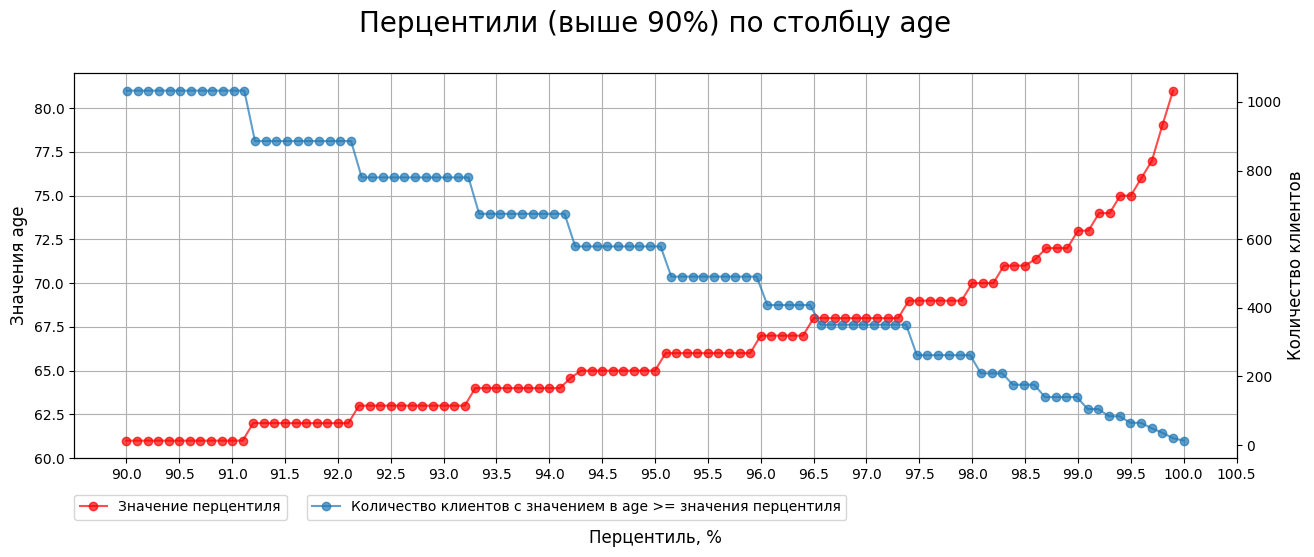

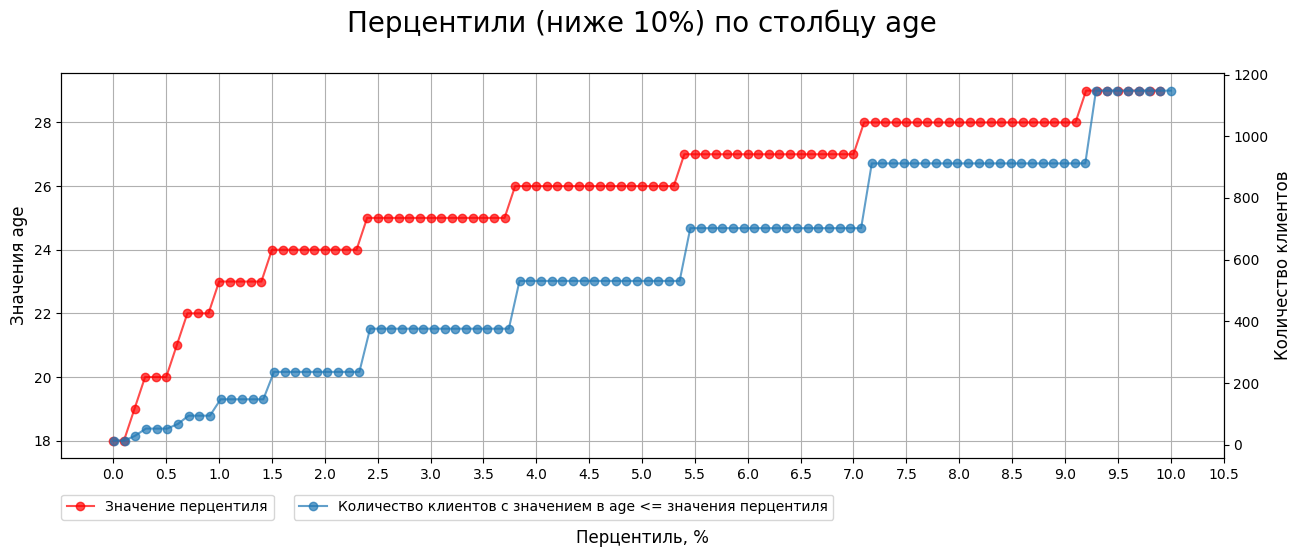

In [18]:
percentile(df, 'age', 0.1)

Как видно из графиков, клиентов старше 75 лет менее 0.5%. Исключим из данных клиентов старше этого возраста. Но так как в нашем исследовании мы изучаем не конкретный возраст клиентов, а диапазоны, то клиентов старше 75 лет оставим в датасете.

[К оглавлению](#0)

<a id=2.2.3.3 ><a/>

##### Столбцец `balance`

Рассмотрим распределение баланса на счетах клиентов

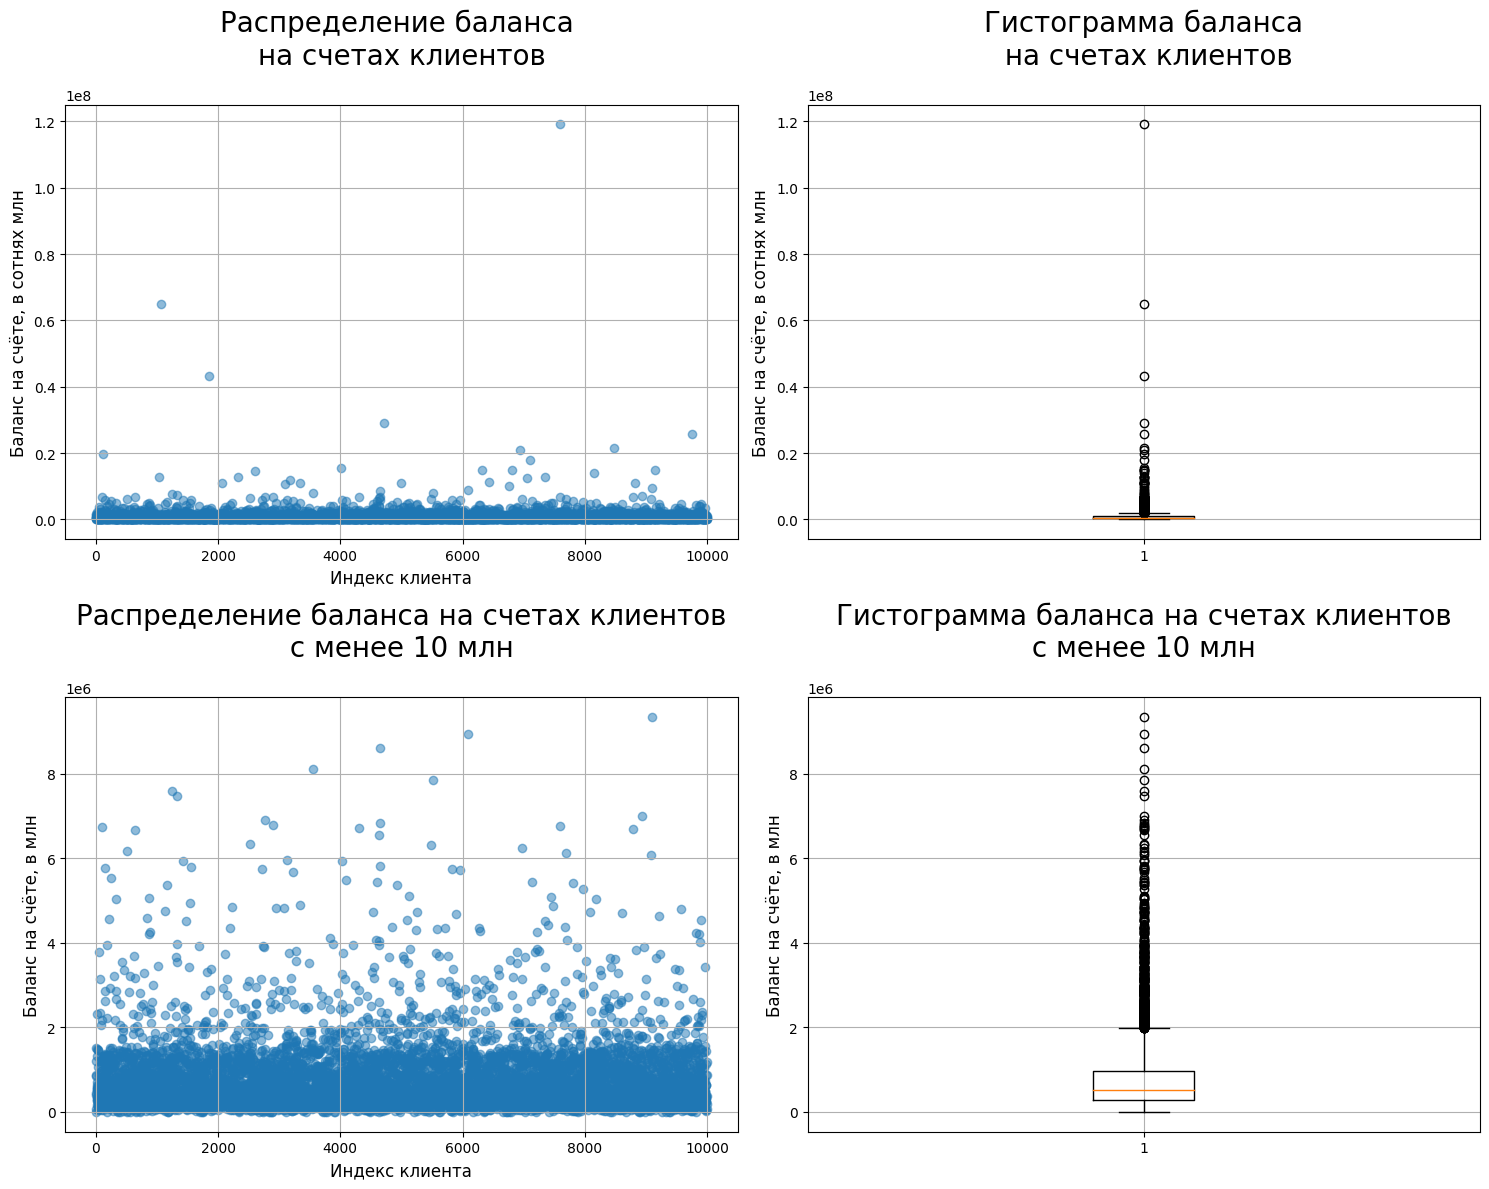

In [19]:
plt.figure(figsize=(15, 12))

ax1 = plt.subplot(2,2,1)
plt.scatter(
    data=df,
    x=df.index,
    y='balance',
    alpha=0.5
)
plt.grid(True)
plt.title('Распределение баланса \nна счетах клиентов\n', fontsize=20)
plt.ylabel('Баланс на счёте, в сотнях млн', fontsize=12)
plt.xlabel('Индекс клиента', fontsize=12);

ax2 = plt.subplot(2,2,2)

plt.boxplot(df.loc[df['balance'] > 0]['balance'])
plt.grid(True)
plt.title('Гистограмма баланса\n на счетах клиентов\n', fontsize=20)
plt.ylabel('Баланс на счёте, в сотнях млн', fontsize=12)

ax3 = plt.subplot(2,2,3)
plt.scatter(
    data=df.query('balance < 10000000'),
    x=df.query('balance < 10000000').index,
    y='balance',
    alpha=0.5
)
plt.grid(True)
plt.title('Распределение баланса на счетах клиентов\n с менее 10 млн \n', fontsize=20)
plt.ylabel('Баланс на счёте, в млн', fontsize=12)
plt.xlabel('Индекс клиента', fontsize=12);

ax4 = plt.subplot(2,2,4)

plt.boxplot(df.query('0 < balance < 10000000')['balance'])
plt.grid(True)
plt.title('Гистограмма баланса на счетах клиентов\n с менее 10 млн \n', fontsize=20)
plt.ylabel('Баланс на счёте, в млн', fontsize=12)
plt.tight_layout();

Большая часть клиентов имеет на своих счетах не более 2 млн рублей. Также много клиентов со счётом до 6 млн рублей. И выделяется лишь несколько клиетов со стчётом более 20 млн рублей. построим графики перцентилей.

C:\Users\RA\AppData\Local\Temp\ipykernel_12264\2457171891.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();
C:\Users\RA\AppData\Local\Temp\ipykernel_12264\2457171891.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


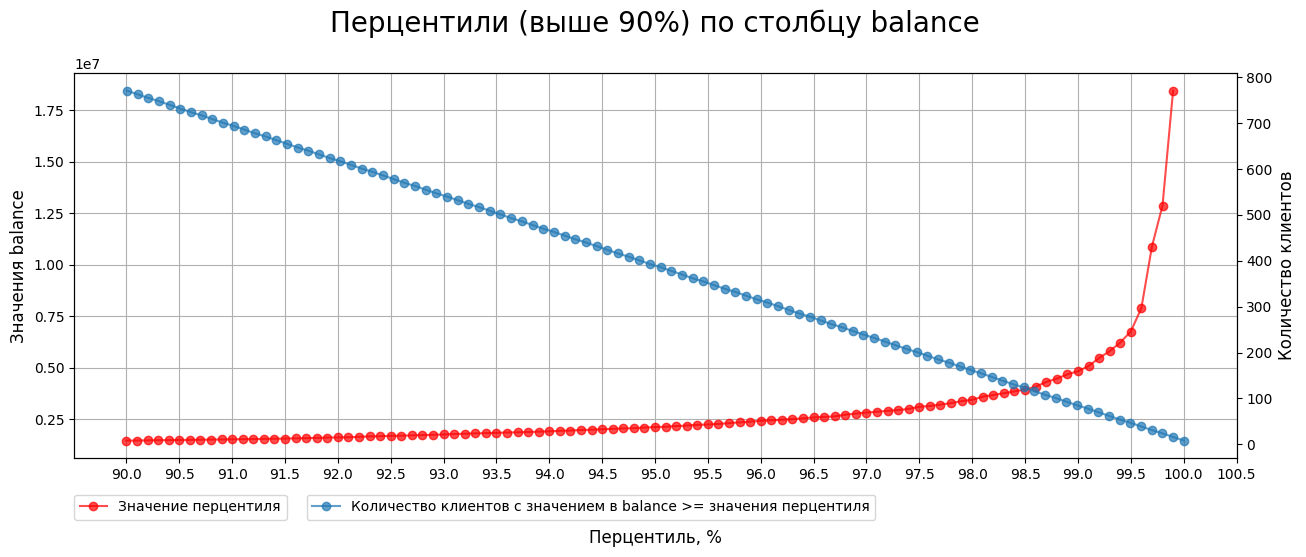

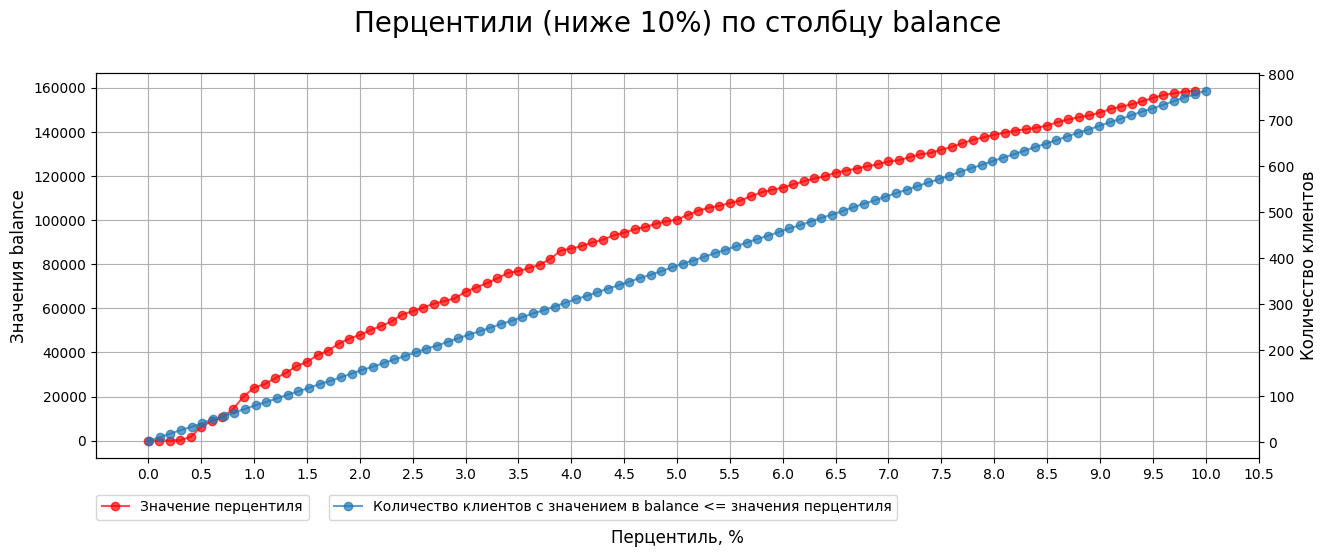

In [20]:
percentile(df, 'balance', 0.1)

Клиентов со счётом более 6 млн рублей менее 0.6%, исключим их из дадафрейма.

In [21]:
df = df.loc[(df['balance'] <= np.percentile(df.query('balance > 0')['balance'], [99.9])[0]) | (df['balance'].isna())]
df.shape

(9992, 12)

[К оглавлению](#0)

<a id=2.2.3.4 ><a/>

##### Столбцец `est_salary`

Рассмотрим оценочный доход клиентов.

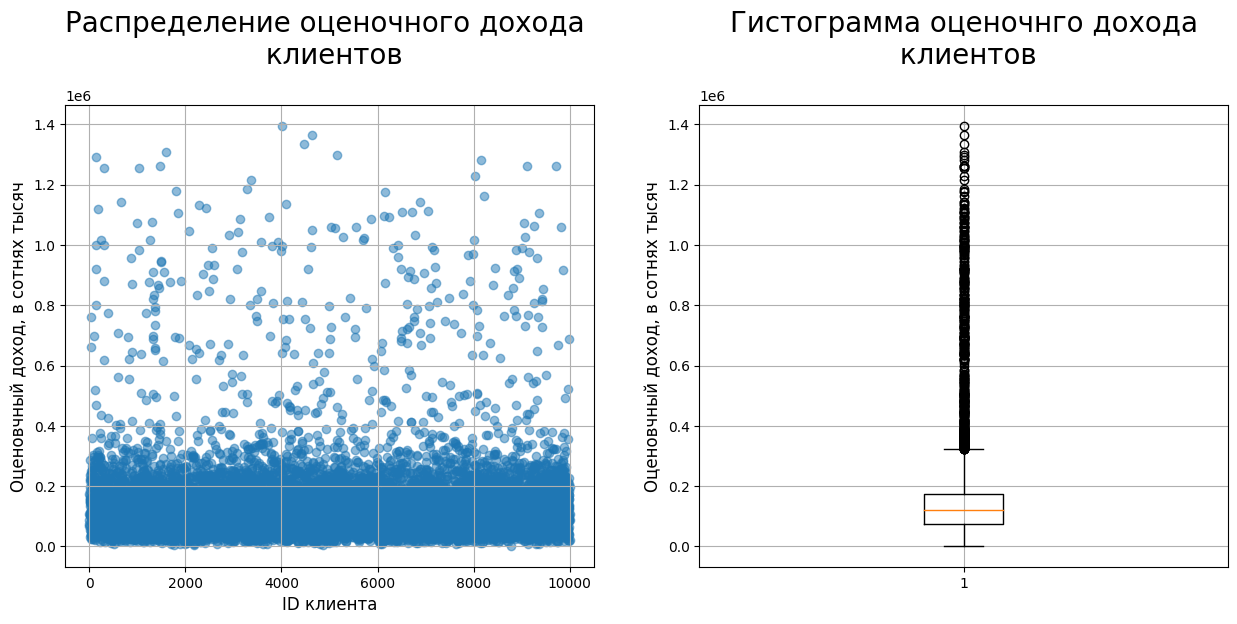

In [22]:
plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1,2,1)
plt.scatter(
    data=df,
    x=df.index,
    y='est_salary',
    alpha=0.5
)
plt.grid(True)
plt.title('Распределение оценочного дохода \n клиентов\n', fontsize=20)
plt.ylabel('Оценовчный доход, в сотнях тысяч', fontsize=12)
plt.xlabel('ID клиента', fontsize=12);

ax2 = plt.subplot(1,2,2)

plt.boxplot(df['est_salary'])
plt.grid(True)
plt.title('Гистограмма оценочнго дохода\n клиентов\n', fontsize=20)
plt.ylabel('Оценовчный доход, в сотнях тысяч', fontsize=12);

У большего количества пользователей оценочный уровень дохода составляет около 300 тысяч рублей. Построим графики перцентилей.

C:\Users\RA\AppData\Local\Temp\ipykernel_12264\2457171891.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();
C:\Users\RA\AppData\Local\Temp\ipykernel_12264\2457171891.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


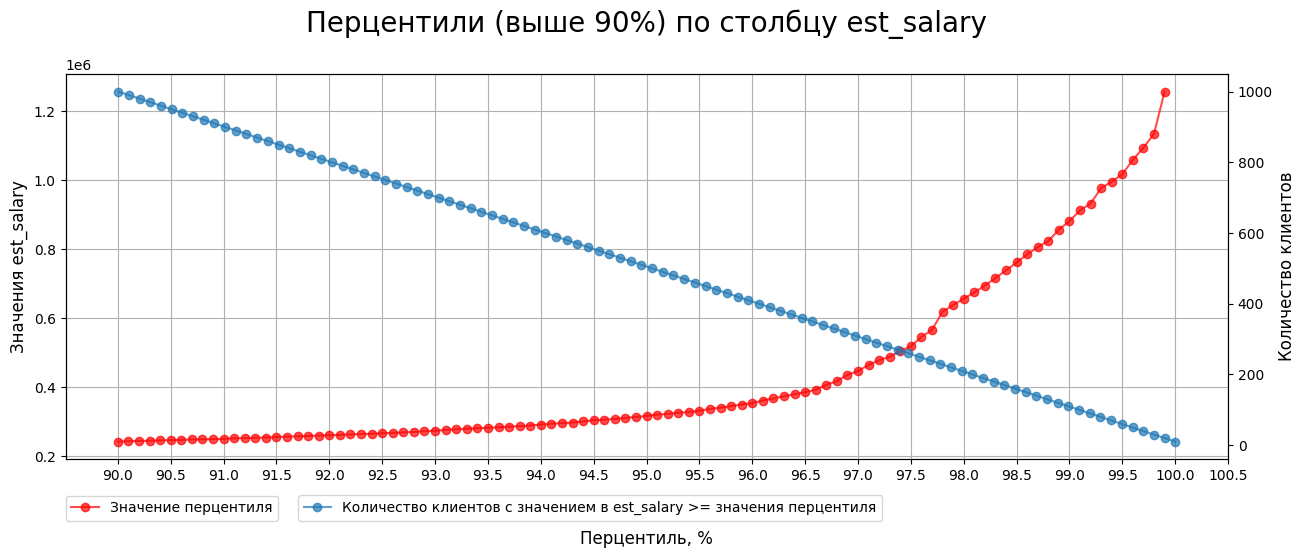

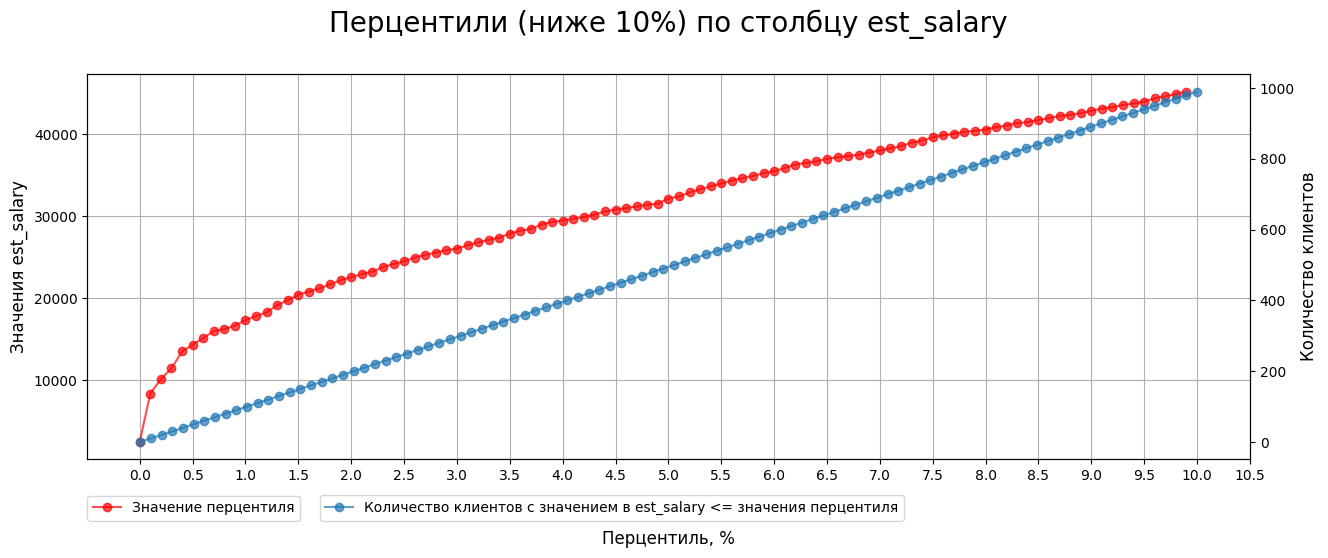

In [23]:
percentile(df, 'est_salary', 0.1)

Информация по этому признаку получена синтетическим, путём неизвестных нам расчётов, что не может говоить об их 100% достоверности. Исключим из дадафрейма клиентов с оценочным ежемесячных доходом более 1.2 млн. рублей менее 0.1%.

In [24]:
df = df.loc[(df['est_salary'] <= np.percentile(df['est_salary'], [99.9])[0]) | (df['est_salary'].isna())]
df.shape

(9982, 12)

<div class="alert alert-info"> <b>Комментарий студента 1:</b> Добавил обоснование.
</div>

[К оглавлению](#0)

<a id=2.2.3.5 ><a/>

##### Столбцец `equity`

Рассмотрим распределение количества баллов собственности 

In [25]:
df['equity'].value_counts().to_frame()

,equity
0,2587
5,1910
4,1846
3,1543
2,1051
1,774
6,161
7,80
8,17
9,13


Клиентов со значенем баллов собственности 8 и 9 слишком мало для анализа, но оставим их датасете, объединив их общую группу

[К оглавлению](#0)

<a id=2.2.3.6 ><a/>

##### Столбцец `products`

Рассмотрим распределение количества продуктов банка используемых пользователями

In [26]:
df['products'].value_counts().to_frame()

,products
2,5116
1,3336
3,1036
4,474
5,19
0,1


Клиентов с использующих 5 продуктов банка всего 19, но так как нам важно охватить как можно большее количество клиентов оставим их датасете.

[К оглавлению](#0)

<a id=2.2.4.1 ><a/>

#### Обработка пропусков

##### Пропуске в стобце `balance`

In [27]:
df.isna().sum()

user_id           0
score             0
city              0
gender            0
age              26
equity            0
balance        2290
products          0
credit_card       0
activity          0
est_salary        0
churn             0
dtype: int64

Рассмотрим подробнее пропуски в столбце `balance`. Нам известно, что в сумму баланса клиентов не входят кредитные продукты, за исключением кредитных карт имеющих расчётный счёт. Можно предположить, что клиенты имеющие кредитные карты могут иметь нулевой `balance`. Также нулевой баланс может быть у ушедших клиентов. Показатель `churn` равный `1` включает в себя не только уже ушедших клиентов, но и только собирающихся это сделать. Обратимсья к показателю активности за последниый месяц `activity`, можно преположить, что клиенты имеющие в признак оттока равный `1` и признак активности `0` - это уже ушедшие из банка клиенты.  

Проверим последнее предположение

In [28]:
df.loc[(df['balance'].isna() & df['churn'] == 1)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn
1273,136567,961,Ярославль,1,31.0,0,NaN,1,1,0,1015386.14,1
1400,146876,707,Ярославль,1,24.0,0,NaN,3,1,0,94091.11,1
3017,123230,980,Рыбинск,0,53.0,0,NaN,1,1,1,327646.02,1
4118,157443,727,Ростов,1,69.0,0,NaN,1,1,0,132546.93,1
4302,167482,955,Ярославль,1,62.0,0,NaN,1,1,0,157784.96,1
5578,136508,739,Рыбинск,1,49.0,0,NaN,2,1,1,280945.17,1
6827,205707,953,Ярославль,1,30.0,0,NaN,3,1,0,157069.20,1
7572,144559,748,Ярославль,1,45.0,0,NaN,1,1,0,288756.23,1
8185,116284,743,Ярославль,1,48.0,0,NaN,1,1,1,634457.21,1
8611,195981,763,Ярославль,0,48.0,0,NaN,1,1,0,248232.39,1


Клиентов имеющих признак оттока и пропуск в балансе 14 человек. Из них 3 имеют активность. У всех за исключением одного клиента используемых банковских продуктов более 0. Предположим, что клиент с нулем в количестве продуктов уже ушедший клиент. Заполним его пропуск 0. Остальные клиенты из этого среза вероятно дейтсвующие.

In [29]:
df.loc[df['balance'].isna() & (df['churn'] == 1) & (df['products'] == 0), 'balance'] = 0

Проверим количество клиентов имеющих пропуск в балансе и владеющих кредитными картами.

In [30]:
df.loc[(df['balance'].isna() & df['credit_card'] == 1)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn
2,120722,892,Рыбинск,0,30.0,0,NaN,1,1,1,107683.34,0
10,148929,927,Ростов,1,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,1,41.0,0,NaN,1,1,1,217469.48,0
30,155730,946,Ярославль,0,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944,Ярославль,1,35.0,0,NaN,2,1,1,239843.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9974,160702,919,Рыбинск,1,26.0,0,NaN,1,1,1,187423.66,0
9984,125941,729,Ярославль,0,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884,Рыбинск,0,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894,Ярославль,1,46.0,0,NaN,1,1,0,196898.29,0


Таких клиентов 1867. Сравним средние значения признаков для клиентов с пропусками и без пропусков в столбце `balance`, а также корреляцию для клиентов без пропусков и клиентов с пропусками, с заполненным нулями в `balance` 

In [31]:
(pd.DataFrame({'balnce_isna': df[(df['balance'].isna())].mean(), 'balnce_notull': df[df['balance'] > 0].mean()})
 .sort_values(by='balnce_isna')[:-1]
 .style.format('{:.3f}')
)

,balnce_isna,balnce_notull
churn,0.005,0.235
equity,0.050,3.394
activity,0.551,0.516
gender,0.559,0.482
credit_card,0.816,0.640
products,1.163,2.081
age,42.088,42.930
score,865.372,843.584
user_id,172018.332,171763.725
est_salary,224056.363,123318.619


Клиенты с пропусками практически неотточные, сс средним баллом собсвтенности практичсеки равным нулю, в то время как клиенты без пропусков имеют средний балл собственности равный трём. Доля кредитных карт для клиентов с пропуском больше 80%, а для других около 65%. Количество используемых продуктов в среднем в дав раза ниже чем у клиентов без пропусков в балансе и равно 1. Оценочный доход также пркатически в 2 раза выше чем у клиентов без пропусков. По остальным признакам значения сопоставимы.

Сравним таблицы корреляции.

In [32]:
temp_df = df.copy()
temp_df['balance'] = df['balance'].fillna(0)

In [33]:
(pd.DataFrame({'balnce_0': temp_df.corr()['balance'], 'balnce_notull' : df[df['balance'] > 0].corr()['balance']})
 .sort_values(by='balnce_0')[:-1]
 .style.background_gradient(cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
 .format('{:.2%}')
)

,balnce_0,balnce_notull
credit_card,-16.56%,-12.90%
activity,0.52%,1.93%
gender,2.49%,5.88%
user_id,3.32%,4.17%
age,9.56%,10.33%
score,23.04%,40.59%
est_salary,23.12%,57.18%
churn,24.64%,17.42%
products,29.21%,14.95%
equity,44.88%,29.56%


У клиентов с пропуском в балансе наиблльшая корреляция (слабая) наблюдается с количеством баллов собственности. Как мы выснили ранее средние значения для этого признака стремится к 0. С наличием кредитных карты связь очень слабая, разница в среднем доле наличия кредитных карт различается примерно на 16%. У 82% клиентов с пропуском в балансе есть кредитные карты. А с учётом среднего нулевого значения в баллах собственности и использованием в среднем лишь одного продукта банка можно предположить, что основной используемый продукт банка для этих клиентов - кредитные карты. А как говорилось ранее в скоринге банка в балансе не учитывается кредитные карты, то можно заполнить пропуски в балансе для клиентов имеющих кредитные карты.

In [34]:
df.loc[df['balance'].isna() & df['credit_card'] == 1, 'balance'] = 0
df['balance'].isna().sum()

422

Осталось 422 пропуска, рассмотрим средние значения всех признаков для этих клиентов, таблицу корреляции и распределение по городам.

In [35]:
#df[(df['balance'].isna()) & (df['credit_card'] == 0)].mean().to_frame()
df[(df['balance'].isna())].mean().to_frame().style.format('{:.3f}')

,0
user_id,173515.410
score,902.701
gender,0.512
age,46.140
equity,0.040
balance,nan
products,1.199
credit_card,0.000
activity,0.552
est_salary,206085.500


In [36]:
df.corr()['balance'].to_frame().sort_values(by='balance')[:-1].style.background_gradient(cmap=plt.cm.coolwarm, vmin=-1, vmax=1)

,balance
credit_card,-0.220692
activity,0.007110
gender,0.026442
user_id,0.035736
age,0.107138
churn,0.236338
est_salary,0.256146
score,0.262426
products,0.276572
equity,0.431528


In [37]:
df[(df['balance'].isna()) & (df['credit_card'] == 0)].groupby('city')['city'].count()

city
Ростов        86
Рыбинск      140
Ярославль    196
Name: city, dtype: int64

Клиенты имющие пропуск в столбце `balance` в трудноспособном возрасте, окола 45 лет,  пол распределён примерно поровну, имеют высокую средню оценку баллов кредитного скоринга  и достаточно высокое значение оценочного ежемесячного дохода. Активность составляет примерно 50%, при этом  в большинстве случев пользуются лишь одним банковсим продуктом. и почти все они действующие клиенты не собирающиеся прекращать пользоваться услугами нашего банка. При этом почти у всех количество баллов собственности равно нулю. Самая высокая корреляци наблюлается с `est_salary`, заполним пропуски используя коэфиициенты рассчитанные отношением медиан в столбцах `balance` к `est_salary` рассчитанные по каждой группе `equity`.

Используем метод линейоной регрессии для заполнения пропусков. Наибольшая корреляция баланса наблюдается со столбцами `est_salary`, `score` и `equity`. Используем их для расчётов.

In [38]:
#Выделим данные для расчётов не подвергавшиеся заполнению нулями
lr = df.loc[df['balance'] != 0][['equity', 'score', 'est_salary', 'credit_card', 'balance']]

scaler1 = StandardScaler()

# применяем метод .fit_transform() и сразу помещаем результат в датафрейм
lr = pd.DataFrame(scaler1.fit_transform(lr), columns = lr.columns)

In [39]:
#Выделим фрейм данных с пропусками
required_balance = lr.loc[lr['balance'].isna()]

X_work = required_balance.drop('balance', axis = 1)

#Выделим данные для обучения модели
train_balance = lr.loc[lr['balance'].notna()]

In [40]:
y = train_balance['balance']
 
X = train_balance.drop('balance', axis = 1)

#Создадим тестовые и обучающие данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# создадим объект класса линейной регрессии
lr_model = LinearRegression()
 
# обучим модель
lr_model.fit(X_train, y_train)
 
# применим обученную модель к тестовым данным
y_pred = lr_model.predict(X_test)

Проверим результаты модели с использованием:
- Mean absolute error (MAE) - средняя абсолютная ошибка;
- Root mean square error (RMSE) или Root mean square deviation (RMSD) - квадратный корень из MSE (среднеквадратическая ошибка);
- Coefficient of determination (R2) -  коэффициент детерминации.

In [42]:
print('MAE: {:.2%}'.format(mean_absolute_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(mean_squared_error(y_test, y_pred) * 0.5))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred)))

MAE: 43.97%
RMSE: 0.22
R2: 0.50


При комбирировании наиболее коррелирующих признаков удалось увеличить коэффициент детерминации `R2` до 50%, что является нижней планкой для хотя бы немного приемлимой модели. Средняя абсолютная ошибка `MAE` составила при этом 43%.  Среднеквадратическая ошибка `RMSE` 0.22. Качество модели оставляет желать лучшего, но всё же используем её для заполнения оствшихся пропусков. 

Примерим модель к пропущенным значениям.

In [43]:
y_pred_balance = lr_model.predict(X_work)

#Создаём список с рассчитанными значениями
required_balance['balance'] = y_pred_balance

C:\Users\RA\AppData\Local\Temp\ipykernel_12264\608584555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_balance['balance'] = y_pred_balance


In [44]:
#Конвертируем данные в исходный формат
lr_balance = pd.DataFrame(scaler1.inverse_transform(required_balance),
                          columns = required_balance.columns)['balance'].abs().round(0)

#Меняем индексы на индексы из основного датафрема
lr_balance.index = df[df['balance'].isna()].index
lr_balance

9       1272435.0
19       883395.0
21      1173474.0
52       773482.0
60       768610.0
          ...    
9905    1172504.0
9907     890622.0
9943     767830.0
9946     777853.0
9976     841804.0
Name: balance, Length: 422, dtype: float64

Заполняем пропуски рассчитанными значениями

In [45]:
#Меняем индексы на индексы из основного датафрема
lr_balance.index = df[df['balance'].isna()].index

#Заполняем пропуски
df['balance'] = df['balance'].fillna(lr_balance)

user_id         0
score           0
city            0
gender          0
age            26
equity          0
balance         0
products        0
credit_card     0
activity        0
est_salary      0
churn           0
dtype: int64

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn
9,133130,906,Ярославль,0,67.0,0,1272435.0,1,0,1,238055.53,0
19,127034,922,Рыбинск,0,53.0,0,883395.0,1,0,0,147094.82,0
21,177415,896,Рыбинск,0,47.0,0,1173474.0,1,0,0,225060.35,0
52,214266,888,Ярославль,0,37.0,0,773482.0,2,0,0,149164.44,0
60,191602,944,Ярославль,0,71.0,0,768610.0,2,0,1,107801.19,0
138,173386,915,Ярославль,0,48.0,0,4060265.0,2,0,0,800733.72,0
223,180144,921,Ярославль,0,62.0,0,577248.0,1,0,1,85312.42,0
253,220825,908,Рыбинск,0,35.0,0,578288.0,1,0,1,94896.19,0
276,178089,914,Ярославль,0,51.0,0,1102517.0,1,0,1,197598.06,0
310,220562,973,Ярославль,1,36.0,0,4659098.0,3,0,0,881181.61,0


Медиана и стандартное отклонение баланса до заполнения пропусков:  522630.0    968313.0 
Медиана и стандартное отклонение баланса после заполнения, не включаю нули 545023.0    965173.0


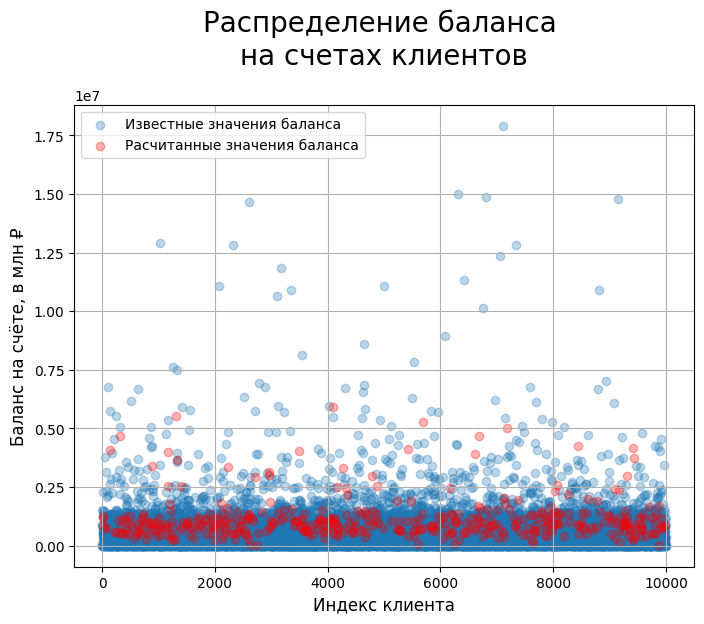

In [46]:
display(df.isna().sum(), df.query('index in @lr_balance.index').head(10))
print('Медиана и стандартное отклонение баланса до заполнения пропусков: ', 
      df.query('index not in @lr_balance.index and balance != 0')['balance'].median().round(0), '  ',
      df.query('index not in @lr_balance.index and balance != 0')['balance'].std().round(0),
      '\nМедиана и стандартное отклонение баланса после заполнения, не включаю нули',
      df.query('balance != 0')['balance'].median().round(0), '  ', df.query('balance != 0')['balance'].std().round(0))
plt.figure(figsize=(8, 6))
plt.scatter(
    data=df.query('index not in @lr_balance.index'),
    x=df.query('index not in @lr_balance.index').index,
    y='balance',
    alpha=0.3,
    label='Известные значения баланса'
)

plt.scatter(
    data=df.query('index in @lr_balance.index'),
    x=df.query('index in @lr_balance.index').index,
    y='balance',
    alpha=0.3,
    c='r',
    label='Расчитанные значения баланса'
)

plt.grid(True)
plt.title('Распределение баланса \nна счетах клиентов\n', fontsize=20)
plt.ylabel('Баланс на счёте, в млн ₽', fontsize=12)
plt.xlabel('Индекс клиента', fontsize=12)
plt.legend();

Значения полученные с и пользованием линейной регресии сопоставимы с известными ранее.

[К оглавлению](#0)

<a id=2.2.4.2><a/>

##### Пропуске в стобце `age`

Рассмотрим пропуски в столбце `age`.

In [47]:
df[df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn
1247,228075,932,Ярославль,1,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692,Рыбинск,0,NaN,0,0.00,1,1,1,160368.82,0
2444,221156,913,Ярославль,1,NaN,0,0.00,1,1,1,135693.24,0
3091,138660,836,Ростов,0,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,1,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827,Рыбинск,0,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884,Рыбинск,0,NaN,0,0.00,1,1,1,137500.77,0
7236,210135,908,Рыбинск,0,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920,Рыбинск,0,NaN,0,0.00,1,1,0,159248.67,0
7345,184913,829,Ярославль,0,NaN,3,188648.77,2,0,1,75206.90,0


In [48]:
df.corr()['age'].to_frame().sort_values(by='age')[:-1].style.background_gradient(cmap=plt.cm.coolwarm, vmin=-1, vmax=1)

,age
gender,-0.213203
credit_card,-0.123310
churn,-0.049967
est_salary,-0.035298
score,-0.011201
activity,-0.008628
products,0.016664
user_id,0.018764
equity,0.020212
balance,0.105210


In [49]:
df['age'].isna().sum()

26

In [50]:
print('Доля пропусков по столбу `age` от всего датафрейма составляет: ', round(df['age'].isna().sum() / len(df) * 100, 2), '%')

Доля пропусков по столбу `age` от всего датафрейма составляет:  0.26 %


Явной закономерности по пропускам в столбце `age` нет, корреляция со всеми остальными признакакми отсутсвует. Наблюдается лишь очень слабая отрицательная корреляция с признаками `gender`, `credit_card` и положительная с `balance`. Доля пропусков от всего датафрема составляет не более 0.23% Исключим этих клиентов из датафрейма.

In [51]:
df = df.dropna(subset=['age'])
df.shape

(9956, 12)

После обработки аномальных значений и пропусков из датафрейма исключеноо 0.4% данных, что вписывается в приемлимые 5%.

[К оглавлению](#0)

<a id=2.2.5 ><a/>

#### Добавление новых столбцов

Преобразуем категориальный столбец `city` в бинарные столбцы, т.к. нам требуется понять, есть ли связь между городом филиала банка и оттоком клиентов.

In [52]:
dummies = pd.get_dummies(df['city']).rename(columns={'Ростов': 'city_rostov', 
                                                     'Рыбинск': 'city_rybinsk',
                                                     'Ярославль': 'city_yaroslavl'})
df = pd.concat([df, dummies], axis=1)
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,activity,est_salary,churn,city_rostov,city_rybinsk,city_yaroslavl
0,183012,850,Рыбинск,0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861,Рыбинск,0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892,Рыбинск,0,30.0,0,0.00,1,1,1,107683.34,0,0,1,0
3,225363,866,Ярославль,0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730,Ярославль,1,34.0,5,174.00,1,1,0,67353.16,1,0,0,1


In [53]:
df.shape

(9956, 15)

[К оглавлению](#0)

<a id=3.1 ><a/>

##  Исследовательский анализ данных

### Исследование оттока клиентов в разрезе имеющихся признаков

Сравним средние значений и медианы известных признаков в зависимости от признака ухода `churn`.

In [54]:
display('Медианы', df.drop(columns=['user_id', 'city', 'city_rostov', 'city_rybinsk', 'city_yaroslavl'])
 .groupby('churn')
 .median()
 .T
 .style.format('{:.1f}'),
       'Среднее',
       df.drop(columns=['user_id', 'city', 'city_rostov', 'city_rybinsk', 'city_yaroslavl'])
 .groupby('churn')
 .mean()
 .T
 .style.format('{:.1f}') 
)

'Медианы'

churn,0,1
score,848.0,866.0
gender,0.0,1.0
age,40.0,39.0
equity,3.0,4.0
balance,369207.9,775349.2
products,2.0,2.0
credit_card,1.0,1.0
activity,0.0,1.0
est_salary,118058.5,125390.6


'Среднее'

churn,0,1
score,845.3,863.3
gender,0.5,0.6
age,43.0,41.4
equity,2.4,3.8
balance,550592.0,1076500.4
products,1.8,2.4
credit_card,0.7,0.6
activity,0.5,0.7
est_salary,146095.3,147268.4


Существенных различий между уходящими и остающимися клиентами в баллах кредитного скоринга, поле, возрасте, использовани кредитных карт и лценочном доходе нет. Но клиенты собирающиеся уходить имеют больший балл собственности, количество используемых продуктов и балансе на счёте. Также уходящие клиенты более активны.

[К оглавлению](#0)

<a id=3.2 ><a/>

### Относительные значения в категориальных признаках

Рассмотрим относительные распределения в категориальных признаках, а именно в `gender`, `age`, `products`, `credit_card`, `activity`, `churn` и городах. 

In [55]:
first_color = 'cornflowerblue'
second_color = 'tomato'
two_colors = ['cornflowerblue', 'tomato']
colors = ['cornflowerblue', 'tomato', 'palegreen', 'gold', 'paleturquoise', 'orchid', 'wheat','peru', 'pink', 'y']
category_colors = {
    0: 'cornflowerblue',
    1: 'tomato', 
    2: 'palegreen', 
    3: 'gold', 
    4: 'paleturquoise', 
    5: 'orchid', 
    6: 'wheat', 
    7: 'peru', 
    8: 'pink', 
    9: 'y',
    'Ярославль': 'cornflowerblue',
    'Рыбинск': 'tomato', 
    'Ростов': 'palegreen', 
}

<div class="alert alert-info"> <b>Комментарий студента 1:</b> Обновил графики
</div>

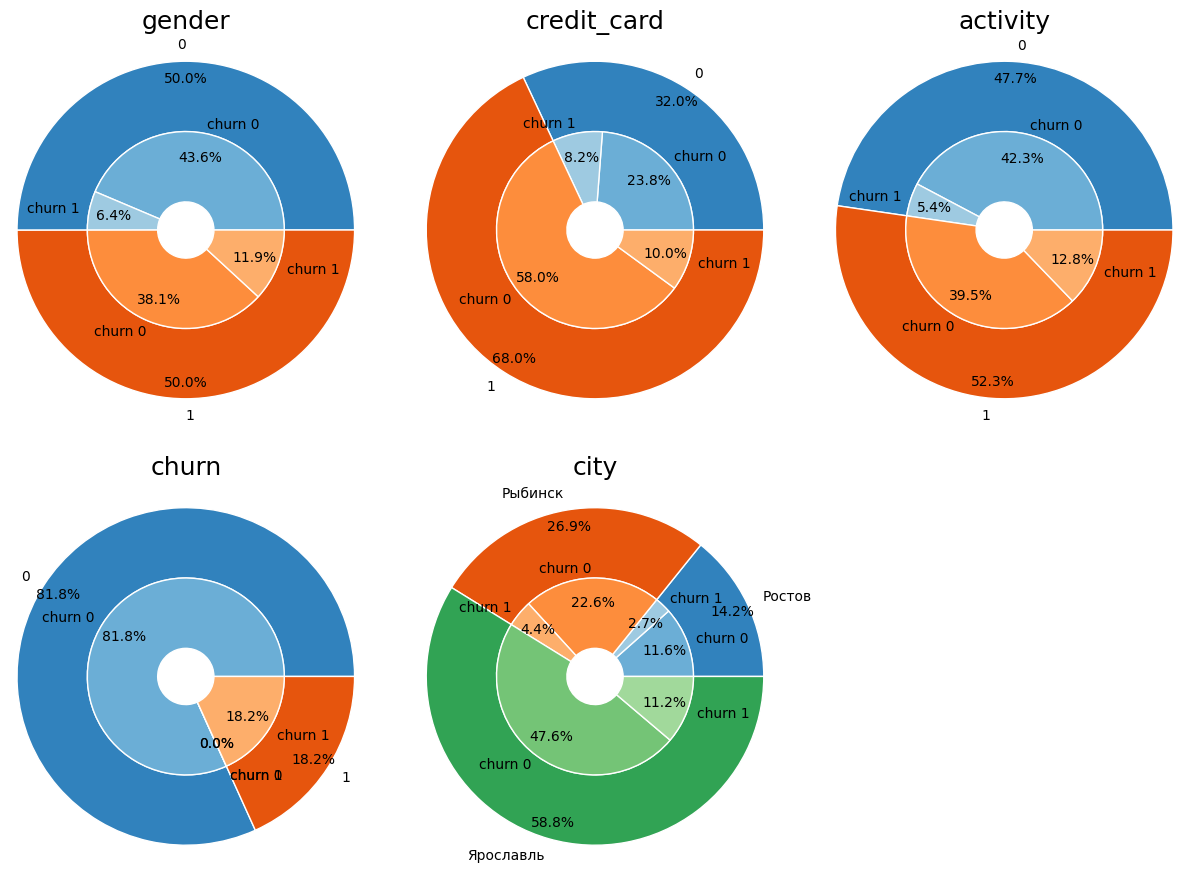

In [56]:
fig, ax = plt.subplots(figsize = (12, 18))
for n, col in enumerate(df[['gender', 'credit_card', 'activity', 'churn', 'city']]):
    ax = plt.subplot(4, 3, n+1)
    #Вычисялем количество клиентов по признакам
    vals = pd.crosstab(df[col], df['churn']).rename(columns={0: 'churn 0', 1: 'churn 1'})
    #Создаём список labels для внутренней части графика
    labels_inner = vals.columns.tolist() * len(vals)

    cmap = plt.get_cmap('tab20c')
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap([1, 2, 5, 6, 9, 10])

    ax.pie(vals.sum(axis=1),
           radius=1.2,
           colors=outer_colors,
           wedgeprops=dict(width=0.5, edgecolor='w'),
           autopct = '%1.1f%%',
           pctdistance = 0.9,
           labels=vals.index
    )

    ax.pie(vals.values.flatten(),
           radius=0.7,
           colors=inner_colors,
           wedgeprops=dict(width=0.5, edgecolor='w'),
           autopct = '%1.1f%%',
           pctdistance = 0.75,
           labels=labels_inner
    )

    ax.set(aspect="equal")
    ax.set_title(col, y=1.05, fontsize=18)
plt.tight_layout()

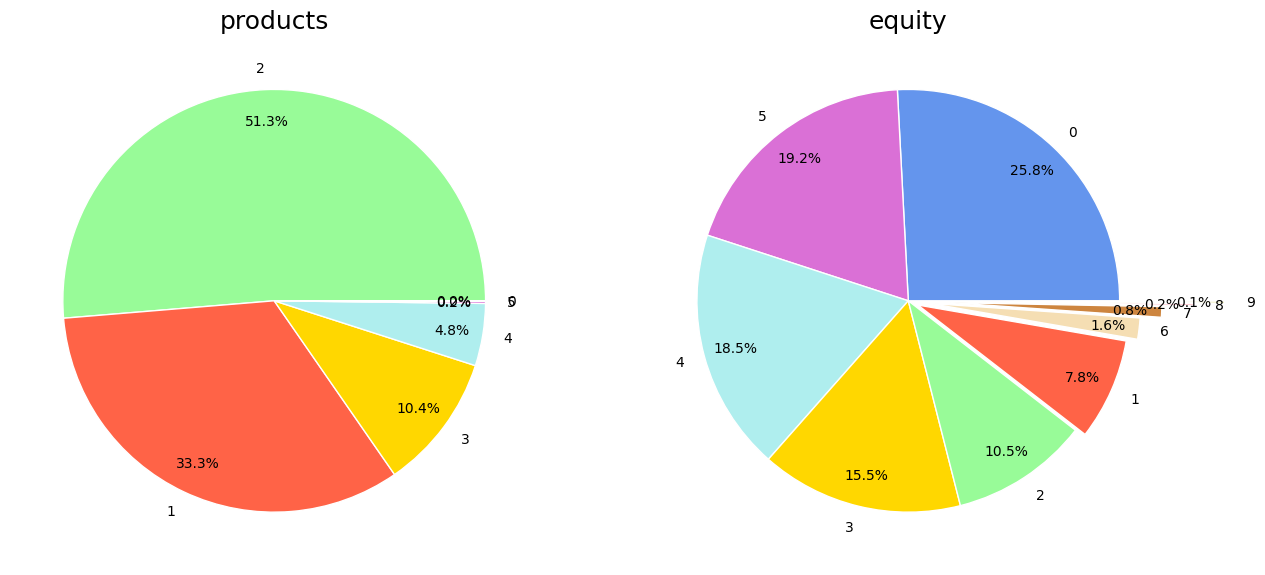

In [57]:
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.1, 0.2, 0.35, 0.5)
plt.subplots(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.pie(
        df['products'].value_counts(),
        autopct = '%1.1f%%',
        wedgeprops = {"linewidth": 1, "edgecolor": "white"},
        pctdistance = 0.85,
        labels = df['products'].value_counts().index,
        colors = df['products'].value_counts().index.map(category_colors),
    )
plt.title('products', fontsize=18)
plt.subplot(1, 2, 2)
plt.pie(
        df['equity'].value_counts(),
        autopct = '%1.1f%%',
        wedgeprops = {"linewidth": 1, "edgecolor": "white"},
        pctdistance = 0.85,
        explode=explode,
        labels = df['equity'].value_counts().index,
        colors = df['equity'].value_counts().index.map(category_colors),
    )
plt.title('equity', fontsize=18)

plt.show();

In [58]:
for n, col in enumerate(df[['gender', 'credit_card', 'activity', 'city', 'products', 'equity']]):
    display(pd.crosstab(df[col],
                        df['churn'],
                        margins=True,
                        normalize='index'
                       )
            .rename(columns={0: 'churn_0', 1: 'churn_1'})
            [0:-1]
            .style.background_gradient(subset=['churn_0', 'churn_1'], cmap='Reds', axis=0)
            .format('{:.1%}')
           )

churn,churn_0,churn_1
gender,,
0,87.2%,12.8%
1,76.3%,23.7%


churn,churn_0,churn_1
credit_card,,
0,74.4%,25.6%
1,85.2%,14.8%


churn,churn_0,churn_1
activity,,
0,88.6%,11.4%
1,75.5%,24.5%


churn,churn_0,churn_1
city,,
Ростов,81.3%,18.7%
Рыбинск,83.7%,16.3%
Ярославль,81.0%,19.0%


churn,churn_0,churn_1
products,,
0,0.0%,100.0%
1,92.9%,7.1%
2,80.9%,19.1%
3,71.3%,28.7%
4,36.7%,63.3%
5,57.9%,42.1%


churn,churn_0,churn_1
equity,,
0,96.5%,3.5%
1,88.0%,12.0%
2,84.2%,15.8%
3,79.1%,20.9%
4,74.9%,25.1%
5,69.8%,30.2%
6,64.0%,36.0%
7,53.8%,46.2%
8,64.7%,35.3%


Доли мужчин и женщин среди клиентов практически раделились практически поровну. Женщина менее предрасположены к уходу, 15% вместо 24% у мужчин. Кредитными картами пользуются около 2/3 клиентов, при этом использующие кредитные карты клменты менее предрасположены к уходу из банка, вероятно из-за своих обязателств. Активных клиентов за последний месяц, примерно, половина от общего числа, при этом они чаще уходят из банка, вероятно это связано с тем, что при уходе клиент выполняет действия, которые засчитываются за активность.  Больше чем половина пользователей пользуется двумя продуктами банка, около 1/3 клиентов - 1 продуктом, 10% - 3 продуктами, большим числом продуктов пользуется менее 5% пользователей. При этом прослеживается закономерность, что чем большее количество продуктов банка изпользует клиент, тем вероятнее он задумывается об уходе из банка. Четверть пользователей имеет ноль баллов собственности. Доли клиентов, с количеством баллов собственности от 5 до 1, расположились в обратном порядке. Клиентов с баллом собственности равным пяти - 19%, с одним баллом около 8%. Клиентов с баллом сосбственности более 5 менее 3%. По аналогии с обратнопропорционально йзависимостью с количеством используемых продуктов банка, клиенты имеющие больший балл собственности чаще уходят из банка, при этом клиенты с нулевым баллом собственности уходят всего 4% случаев. Наибольшая доля клиентов в областном центре - Ярославле, 59%. В Рыбинске около 27% клиентов и в Ростове около 14%, существенных различи в доле уходящих клиеентов в зависимости от города нет. Всего ушедших из банка клиентов или собирающихся это сделать 14%.

[К оглавлению](#0)

<a id=3.3 ><a/>

### Изучение распределения непрерывных величин

Изучим распределение непрерывных величин: возраст, балл кредитного скоринга, оценочный доход и баданс на счетах. 

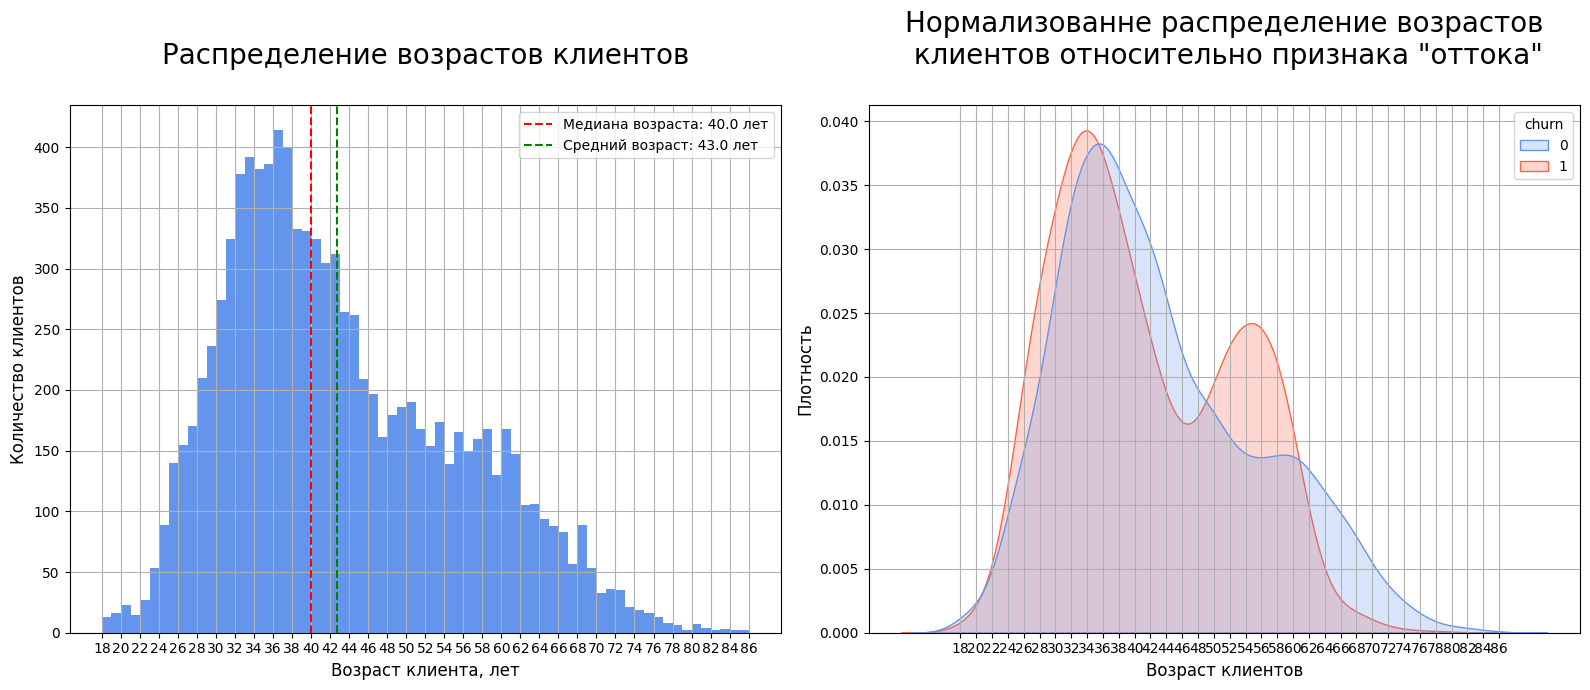

In [59]:
plt.subplots(figsize = (16, 7))

plt.subplot(1, 2, 1)
plt.hist(
    x=df['age'],
    bins=df['age'].nunique(),
    color=first_color
    
)
plt.xticks(
            np.arange(df['age'].min(),
            df['age'].max() + 1,
            2)
)
plt.grid(True)
plt.axvline(df['age'].median(), color='red', linestyle='--', label=f'Медиана возраста: {df.age.median()} лет')
plt.axvline(df['age'].mean(), color='g', linestyle='--', label=f'Средний возраст: {df.age.mean().round(0)} лет')
plt.legend()
plt.title('Распределение возрастов клиентов\n', fontsize=20)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Возраст клиента, лет', fontsize=12)

plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df,
    x='age',
    hue='churn',
    common_norm=False,
    palette=two_colors,
    shade=True
)

plt.xticks(
            np.arange(df['age'].min(),
            df['age'].max() + 1,
            2)
)

plt.grid(True)
plt.title('Нормализованне распределение возрастов\n клиентов относительно признака "оттока"\n', fontsize=20)
plt.ylabel('Плотность', fontsize=12)
plt.xlabel('Возраст клиентов', fontsize=12)
plt.tight_layout()
plt.show();

Распределение возрастов клментов не нормально и смещено влево, к меньшим значениям. Медианный возраст клиентов 40 лет, средний 43 года, значение моды возраста - 37 лет. Количество клиентов в возрасте от 18 до 23 лет минимальное, в то время как старше этого возраста увеличивается в разы. Можно, премположить, что банк практически не работает с молодёжью, студентами, возможно банк не работет с учебными заведенями по выпуску банковских карт для получения стипендий. С 24 до 35 лет вероятность ухода клиентов незначительно выше. С 35 до 49 лет клиенты более лояльны и вероятность их ухода становиться меньше вероятности продолжать обслуживаться в гашем банке. С 49 до 61 года вероятность ухода клиентов становиться больше, на пике в возрасте 55 лет в 1.5 раза, вероятности остаться. Более возрастные клиенты с большей вероятностью остаются верным банку, такая вероятность становиться в разы выше вероятности ухода. Можно предположить, что молодые люди до 35 лет склонные чаще покидать банк вероятно меняют места работы, где могут бытиь разные обслуживающие банки. Далее они чаще остаются в понравившийся банк и/или не меняют место работы. В предпенсионном возрасте начинаются "метания". После чего выбрав банк пожилые люди уже не склонные менять его.

Рассмторим распределение возраста баллов кредитного скоринга `score`.

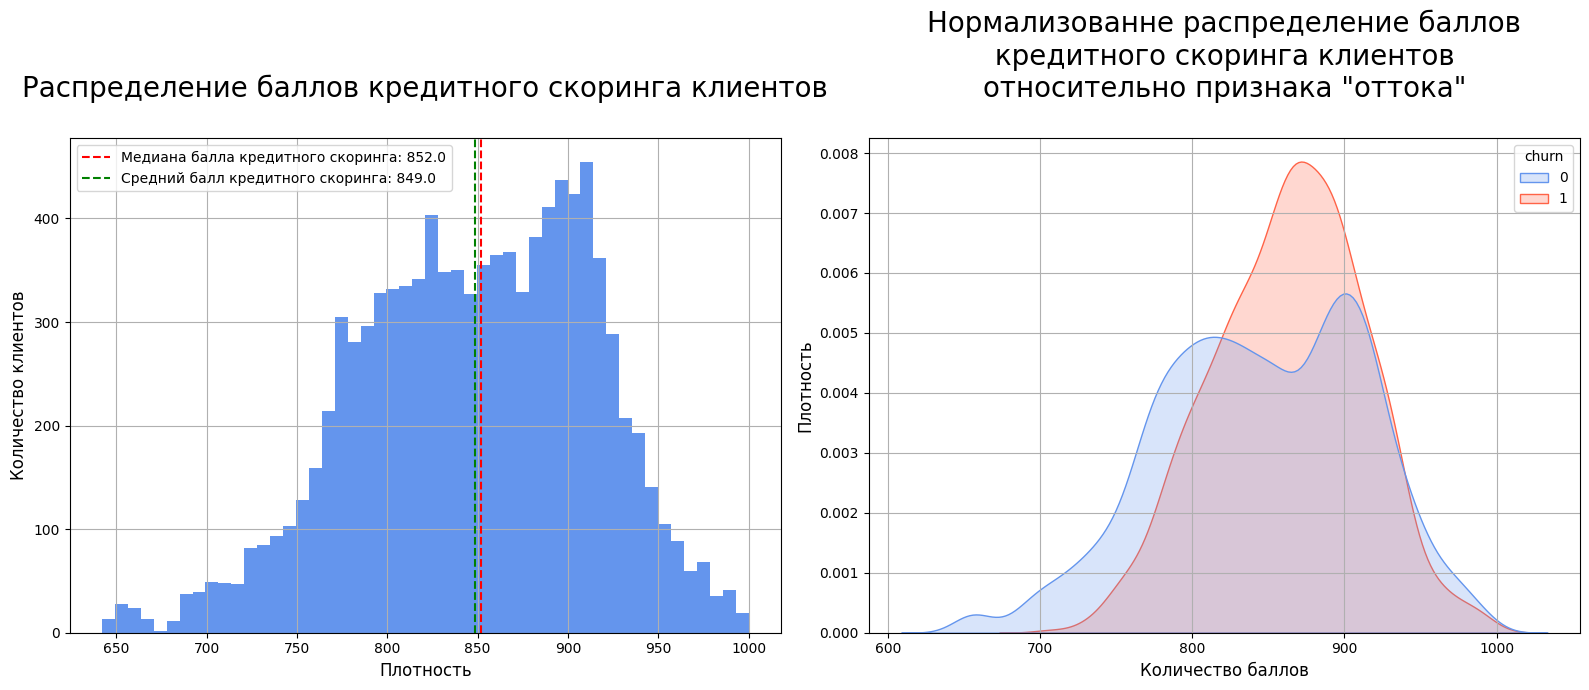

In [60]:
plt.subplots(figsize = (16, 7))

plt.subplot(1, 2, 1)
plt.hist(
    x=df['score'],
    bins=50,
    color=first_color
)

plt.grid(True)
plt.axvline(df['score'].median(), color='red', linestyle='--', label=f'Медиана балла кредитного скоринга: {df.score.median()}')
plt.axvline(df['score'].mean(), color='g', linestyle='--',
            label=f'Средний балл кредитного скоринга: {df.score.mean().round(0)}')
plt.legend()
plt.title('Распределение баллов кредитного скоринга клиентов\n', fontsize=20)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Плотность', fontsize=12)

plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df,
    x='score',
    hue='churn',
    common_norm=False,
    palette=two_colors,
    shade=True
)

plt.grid(True)
plt.title('Нормализованне распределение баллов\n кредитного скоринга клиентов \nотносительно признака "оттока"\n', fontsize=20)
plt.ylabel('Плотность', fontsize=12)
plt.xlabel('Количество баллов', fontsize=12)
plt.tight_layout()
plt.show();

Рсапределение баллов кредитного скоринга клиентов близко к нормальному, но смещено вправо, к большим значениям. Медианное значение - 853 балла, среднее 850 балла. Клиенты с относительно низким баллом кредитного скоринга, до 825 баллов, менее подвержены уходу из банка. В диапазоне 825 -910 баллов клиенты чаще предпочитают уходить из банка. В узком диапазоне с 910 до 940 баллов доли практически равны. С 940 до 990 больше клиентов предпочитают оставаться клиентами банка дальше.

Рассмторим распределение оценочного дохода клиентов `est_salary`.

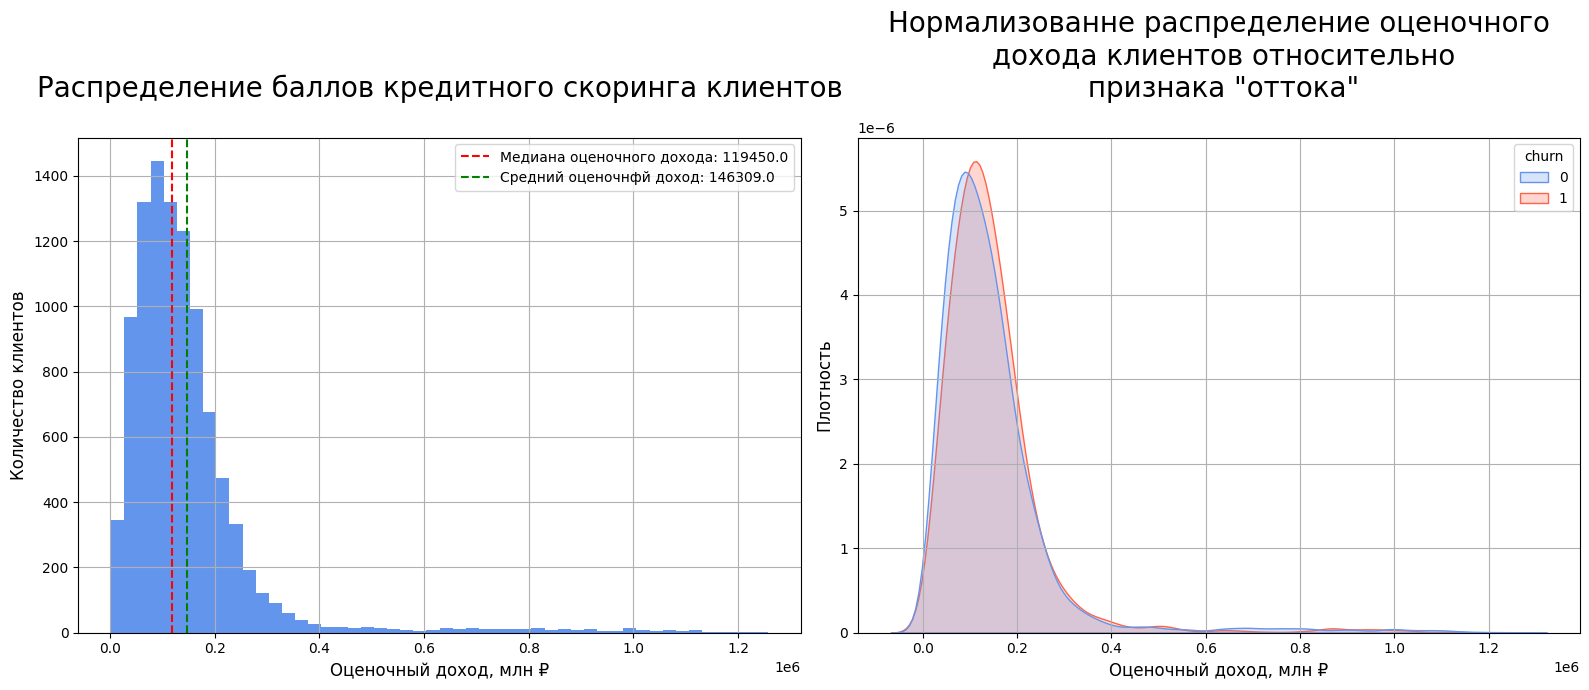

In [61]:
plt.subplots(figsize = (16, 7))

plt.subplot(1, 2, 1)
plt.hist(
    x=df['est_salary'],
    bins=50,
    color=first_color
)

plt.grid(True)
plt.axvline(df['est_salary'].median(), color='red', linestyle='--',
            label=f'Медиана оценочного дохода: {df.est_salary.median().round(0)}')
plt.axvline(df['est_salary'].mean(), color='g', linestyle='--',
            label=f'Средний оценочнфй доход: {df.est_salary.mean().round(0)}')
plt.legend()
plt.title('Распределение баллов кредитного скоринга клиентов\n', fontsize=20)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Оценочный доход, млн ₽', fontsize=12)

plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df,
    x='est_salary',
    hue='churn',
    common_norm=False,
    palette=two_colors,
    shade=True
)

plt.grid(True)
plt.title('Нормализованне распределение оценочного\n дохода клиентов относительно\n признака "оттока"\n', fontsize=20)
plt.ylabel('Плотность', fontsize=12)
plt.xlabel('Оценочный доход, млн ₽', fontsize=12)
plt.tight_layout()
plt.show();

Распределение оценочного дохода ненормальное и смещено влево к меньшим значениям. Большая доля клиентов имеют доход до 300 тысяч ₽, с медианой около 120 тысяч ₽ и средним около 150 тысяч  ₽. Вероятность ухода клиентов практически не зависит от оценочного уровня дохода клиентов, лишь в диапазоне около 100 - 200 тысяч ₽ вероятность ухода незначительно выше.

Рассмотрим распределение оценочного дохода клиентов `balance`.

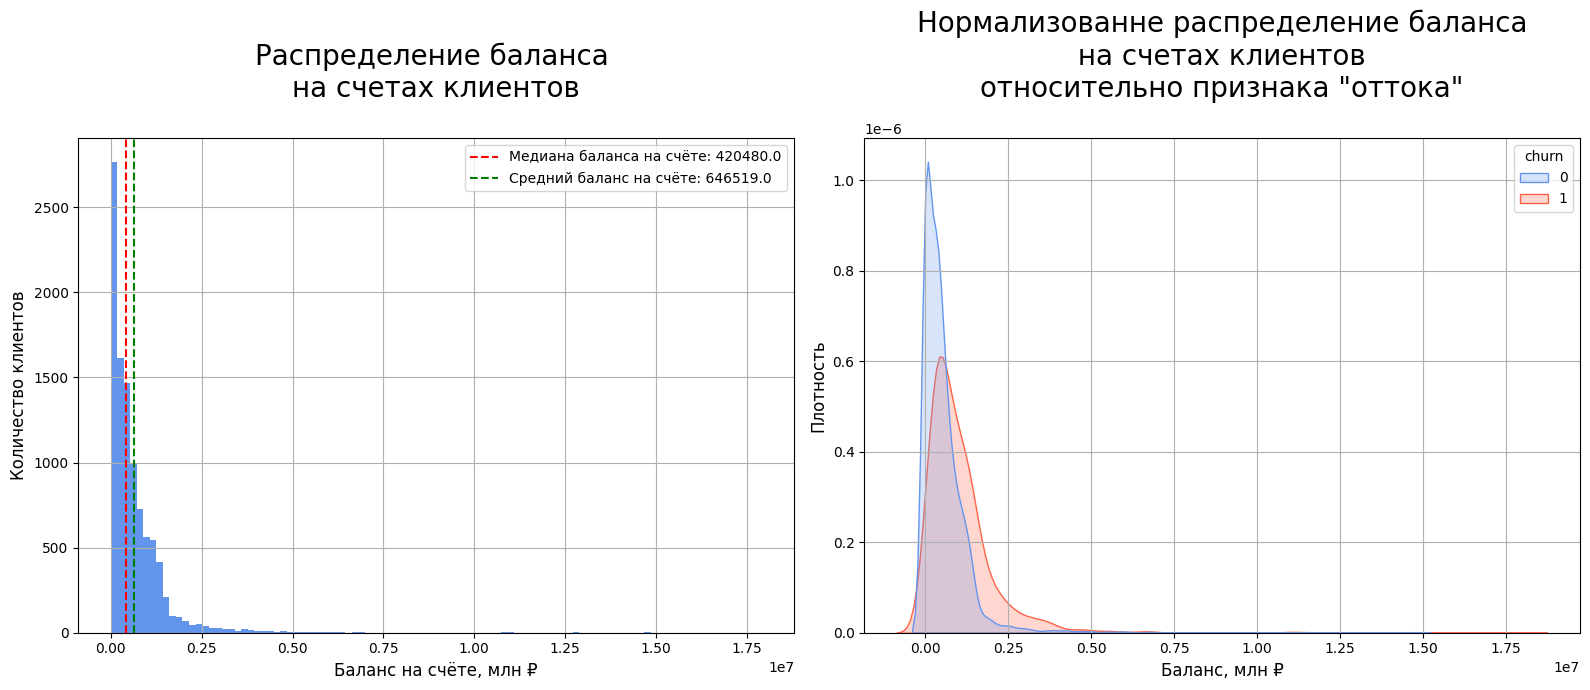

In [62]:
plt.subplots(figsize = (16, 7))

plt.subplot(1, 2, 1)
plt.hist(
    x=df['balance'],
    bins=100,
    color=first_color
    
)

plt.grid(True)
plt.axvline(df['balance'].median(), color='red', linestyle='--',
            label=f'Медиана баланса на счёте: {df.balance.median().round(0)}')
plt.axvline(df['balance'].mean(), color='g', linestyle='--',
            label=f'Средний баланс на счёте: {df.balance.mean().round(0)}')
plt.legend()
plt.title('Распределение баланса \nна счетах клиентов\n', fontsize=20)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Баланс на счёте, млн ₽', fontsize=12)

plt.subplot(1,2,2)
sns.kdeplot(
    data=df,
    x='balance',
    hue='churn',
    common_norm=False,
    palette=two_colors,
    shade=True
)

plt.grid(True)
plt.title('Нормализованне распределение баланса\n на счетах клиентов \nотносительно признака "оттока"\n', fontsize=20)
plt.ylabel('Плотность', fontsize=12)
plt.xlabel('Баланс, млн ₽', fontsize=12)
plt.tight_layout()
plt.show();

Распределение баланса насчетах клиентов ненормальное и смещено влево к меньшим значениям. На графике выделяются нулевые значения после заполнения некоторых пропусков ими. Наибольшая доля клиентов имеет баланс до 1.6 миллионов ₽ Медиана баланса с учётом значений заполненных нулем 420 тысяч ₽, средее же значительно выше - около 606 тыс. Большое количество клиентов имеют на счёте более 2 миллионов ₽. Клиеты имеющие на счетах 0 ₽ со значительно большей вероятностью не покидают банк, это объясняется тем, что для клиентов имеющих пропуски в столбце баланса собирающихся или покинувших банк мы заполнили нулями, онако такая тендеция сохраняется и до 500 тысяч ₽. Можно сказать, что клиенты имеющие значительные сбережения в банке являются более отточными. 

[К оглавлению](#0)

<a id=3.4 ><a/>

### Корреляционный анализ признаков относительно признака оттока клиентов

Для корреляционнго анализа используем константу корреляции Phi_K — это практическая константа корреляции, которая работает последовательно между категориальными, порядковыми и интервальными переменными. Она основана на нескольких уточнениях теста гипотезы Пирсона о независимости двух переменных. По своейсути это статистика теста на сопряженность двух переменных интерпретируемая так, как будто она исходит из повернутого двумерного нормального распределения, где наклон интерпретируется как Phi_K.

In [63]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'activity', 'est_salary', 'churn',
       'city_rostov', 'city_rybinsk', 'city_yaroslavl'],
      dtype='object')

In [64]:
df_phi_k = df.drop(columns=['user_id', 'city'], axis=1).copy()

data_types = {'score': 'interval',
             'gender':'categorical',
             'age':'interval',
             'equity':'categorical',
             'balance':'interval',
             'products':'categorical',
             'credit_card':'categorical',
             'activity':'categorical',
             'est_salary':'interval',
             'city_rostov':'categorical',
             'city_rybinsk':'categorical',
             'city_yaroslavl':'categorical',
             'churn': 'categorical'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df_phi_k.columns]
interval_cols

['score', 'age', 'balance', 'est_salary']

In [65]:
phik_overview = df_phi_k.phik_matrix(interval_cols=interval_cols)

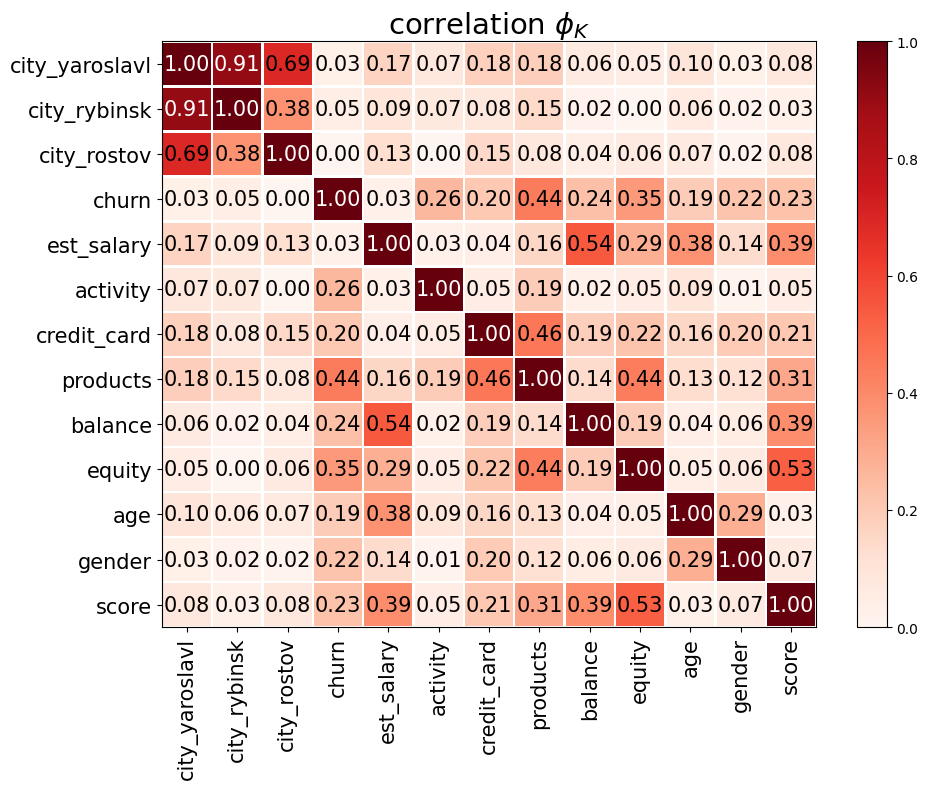

In [66]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index, 
                        vmin=0, 
                        vmax=1,
                        color_map='Reds', 
                        title=r'correlation $\phi_K$', 
                        fontsize_factor=1.5,
                        figsize=(10,8))
plt.tight_layout()

Также рассмотрим положительная или отрицательная корреляции между признаками 

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_phi_k.corr(),
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f'
);

Наибольшая корреляция, средняя и слабая, наблюдается между парами призаков `est_salary` - `balance` и  `equty` - `score`. Выше всего положительная слабая корреляции для признака оттока наблюдаеются с `products` и  `equity`. Очень слабая  корреляция наблюдается с признаками: `acrivity`, `credit_card`, `balance`, `products`, `gender`, `score`, и `age`. Не коррелируют с признаком оттока такие призанки, которые упоминались [и ранее](#3.1), как `city`, `est_salary`. 

[К оглавлению](#0)

<a id=4.1 ><a/>

## Проверка статистичческих гипотез

### Проверка гипотезы различия возраста клиентов использующих один и два продукта банка 

Для начала проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. 

В нашем случае длины выборок не равны. Выборки независимы. Проверим равность дисперсий в выборках.

In [ ]:
print('Дисперсия возраста клиентов пользующихся 2 продуктами',
      statistics.variance(df.query('products == 2')['age'], xbar=None))
print('Дисперсия возраста клиентов пользующихся 1 продуктом',
      statistics.variance(df.query('products == 1')['age'], xbar=None))

Проверка нормальности средних выборочных

In [ ]:
def sample_mean (data, N = 6000):
    mean_list = []
    for i in range(N):
        sample = data.sample(frac=1, replace=True)
        mean_list.append(sample.mean().round(2))
    sns.displot(
        mean_list,
        kde=True,
        bins=30,
        height=5,
        aspect=1.5
    )
    plt.grid(True)
    plt.title('Гистограмма средних выборочных', fontsize=20)
    plt.ylabel('Количество, шт.', fontsize=12)
    plt.xlabel('Среднее выборочное', fontsize=12)
    plt.show;

In [ ]:
sample_mean(df.query('products == 2')['age'])
sample_mean(df.query('products == 1')['age'])

Рсапределение средних выборочных близко к нормальному распределению.
Дисперсии не равны. Для проверки гипотезы воспользуемся двухвыборочным t-тестом. Используем двухсторонне сравнение, т.к. нам неважно, больше или меньше средний возраст в этих выборках. Зададим уровень статистической значимости равный 0.05

Нулевая гипотеза: средний возраст клиентов использующих два продукта банка равен среднему возрасту клиентов использующих один продукт.

Альтернативная гипотеза: средний возраст клиентов использующих два продукта банка не равен среднему возрасту клиентов использующих один продукт.

In [ ]:
alpha = 0.05

result_1 = st.ttest_ind(df.query('products == 2')['age'], df.query('products == 1')['age'], equal_var=False)

print('Средний возраст клиентов использующих два продукта: ', df.query('products == 2')['age'].mean().round(1))
print('Средний возраст клиентов использующих один продукт: ', df.query('products == 1')['age'].mean().round(1))

if (result_1.pvalue < alpha):
    print('pvalue равен: ', result_1.pvalue.round(3), '. При заданном уровне статистической значимости отвергаем нулевую \
гипотезу в пользу альтернативной, средний возраст клиентов использующих два и один продукт различается.')
else:
    print('pvalue равен: ', result_1.pvalue.round(3), '. При заданном уровне статистической значимости, нет оснований \
отвергнуть нулевую гипотезу, средний возраст клиентов использующих два и один продукт не различается.')

Различия в возрасте составлет около 0.6 года. При заданном уровне статистической значимости в 5% средний возраст клиентов использующих два и один продукт разный.

[К оглавлению](#0)

<a id=4.2 ><a/>

### Проверка гипотезы различия среднего баланса на счёте клиентов

Матрица корреляции `Phi_K` обнаружила слабую связь между балансом на счёте клиентов и признаком отточности. Проверим есть различия между средним балансом на счёте отточных и неотточных клиентов. 

Длины выборок не равны. Выборки независимы. Проверим равность дисперсий в выборках.

In [ ]:
print('Дисперсия баланса клиентов пользующихся 2 продуктами',
      statistics.variance(df.query('churn == 0')['balance'], xbar=None))
print('Дисперсия баланса клиентов пользующихся 1 продуктом',
      statistics.variance(df.query('churn == 1')['balance'], xbar=None))

In [ ]:
sample_mean(df.query('churn == 0')['balance'])
sample_mean(df.query('churn == 1')['balance'])

Рсапределение средних выборочных близко к нормальному распределению.
Дисперсии не равны. В нашем случае присутствует большое количество выбросов в значениях баланса, а само распределение не нормально. Для проверки гипотезы воспользуемся двухвыборочным t-тестом. Используем двухсторонне сравнение, т.к. нам неважно, больше или меньше средний возраст в этих выборках. Здадим уровень статистической значимости равный 0.05.

Нулевая гипотеза: средний баланс на сёте неотточных клиентов банка равен среднемубалансу на счёте отточных клиентов.

Альтернативная гипотеза: средний баланс на сёте неотточных клиентов банка не равен среднему балансу на счёте отточных клиентов.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>Гипотезы сформулированы верно ✅</div> <br>

In [ ]:
result_2 = st.ttest_ind(df.query('churn == 0')['balance'], df.query('churn == 1')['balance'], equal_var=False)

print('Средний баланс неотточных клиентов: ', df.query('churn == 0')['balance'].mean().round(1))
print('Средний баланс отточных клиентов : ', df.query('churn == 1')['balance'].mean().round(1))

if (result_2.pvalue < alpha):
    print('pvalue равен: ', result_2.pvalue.round(3), '. При заданном уровне статистической значимости отвергаем нулевую \
гипотезу в пользу альтернативной, средний баланс отточных и неотточных клиентов различается.')
else:
    print('pvalue равен: ', result_2.pvalue.round(3), '. При заданном уровне статистической значимости, нет оснований \
отвергнуть нулевую гипотезу, средний баланс неотточных и отточных клиентов не различается.')

Статистическая гипотеза при заданнома уровне статистичсекой значимости выявила различия в среднем балансе неотточных и отточных клиентов. Различие составляет порядка 200%. Что подтверждает верность корреляции между балансом на счёте и признаком отточности клиентов.

[К оглавлению](#0)

<a id=4.3 ><a/>

### Проверка гипотезы о равенств долей

На основе данных полученных при исследоваительском анализе данных и в частности таблицы корреляции `Phi_K` проверим находят ли статистические критерии разницу между неотточными и отточными клиентами в зависимости от наличия кредитных карт, признака с очень слабой корреляцией. Сравним пропорций двух генеральных совокупностей. Используем значение уровня ститистической значимости `alpha` равное 0.05.

Нулевая гипотеза: доли отточных клиентов неимеющих и имеющих кредитные карты равны.

Альтернативная гипотеза: доли отточных клиентов неимеющих и имеющих кредитные карты неравны.

In [ ]:
data_ztest = pd.crosstab(df['churn'], df['credit_card'])
data_ztest

In [ ]:
alpha_z = 0.05
# пропорция успехов в первой группе:
p1 = data_ztest.loc[1, 0] / data_ztest.loc[0, 0]

# пропорция успехов во второй группе:
p2 = data_ztest.loc[1, 1] / data_ztest.loc[0, 1]

# пропорция успехов в комбинированном датасете:
p_combined = ((data_ztest.loc[1, 0] + data_ztest.loc[1, 1]) / (data_ztest.loc[0, 0] + data_ztest.loc[0, 1]))

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/data_ztest.loc[0, 0] + 1/data_ztest.loc[0, 1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение равно ', p_value.round(5))

if p_value < alpha_z:
    print('P-value меньше критического уровня статистической значимости равного', alpha_z,
          '\nОтвергаем нулевую гипотезу: у клиентов имеющих и неимеющих кредитные карты разный уровень отточности.\n')
else:
    print(
        'P-value больше критического уровня статистической значимости равного', alpha_z,
       '\nНе получилось отвергнуть нулевую гипотезу, у клиентов имеющих и неимеющих кредитные карты одинаковый\
        уровень отточности.\n') 

По результатам тестирования отвергаем нулевую гипотезу о равенстве уровня оттночности групп клиентов имеющих и неимеющих кредитные карты. Следовательно хотя и корреляция `Phi_K` между наличем и отсутсвием кредитных карт и уровней отточности для клиентов составляет всего 20%, но не стоит пренебрегать этим призаком.

[К оглавлению](#0)

<a id=5 ><a/>

## Промежуточный вывод

В ходе проведения исследовательского анализа данных и проверки статистических гипотез выявлено:
- наибольшая корреляция, являющаяся положительной, наблюдается с балансом на счёте и количестве баллов собственности, т.е. более состоятельные клиенты чаще уходят из банка;
- на уровень оттока клиентов не влияет город филиала банка и оценочный уровень дохода, исключим их при сегментации клиентов;
- женщины менее предрасположены к уходу из банка;
- клиенты имеющие кредитные карты менее отточные;
- не актиные клиенты менее отточны;
- чем меньше продуктов банка используеит клиент тем, он менее предрасположен к уходу из банка;
- чем меньше количество баллов собственности клиента тем, он менее предрасположен к уходу из банка;
- клиенты в возрасте от 49 до 61 лет подвержены высокой доле отточности;
- клиенты старше 61 года имеют наименьшую долю отточности;
- клиенты имеющие балл кредитного скоринга в  диапазоне 825 - 900 имеют большую долю отточности;
- клиенты с баласом на счетах более 800 тысяч ₽ более подвержены отточности.

При формирование потенциальных сегментов, на которые стоит направить усилия, чтобы сократить отток клиентов следует обратить внимание на состоятельных клиентов, мужчин не имеющих кредитные карты в возрасте от 49 до 61 года.

[К оглавлению](#0)

<a id=6 ><a/>

## Сегментация клиентов 

Зафиксируем общий уровень оттока, его верхние и нижние границы (+-5%) в банке

In [ ]:
churn = df['churn'].mean()
churn_min = churn - 0.05
churn_max = churn + 0.05

print('Общий уровень оттока:', (churn * 100).round(1), '%')
print('Верхняя граница:', (churn_max * 100).round(1), '%')
print('Нижняя граница:', (churn_min * 100).round(1), '%')

Создадим датафрейм с коррелируемыми с оттоком призанками.

In [ ]:
df_segment = df.drop(columns=['user_id', 'city', 'est_salary', 'city_rostov', 'city_rybinsk', 'city_yaroslavl',
                              'age', 'score', 'balance']).copy()

Категоризируем непрерывные величины в соответствии с нормализованными графиками распределение относительно признака `churn`

In [ ]:
def age_category (data):
    if data['age'] < 23:
        return 'Менее 23'
    elif data['age'] >= 23 and data['age'] < 35:
        return '23-34'
    elif data['age'] >= 35 and data['age'] < 49:
        return '35-48'
    elif data['age'] >= 49 and data['age'] < 61:
        return '49-60'
    else:
        return 'Более 60'
    
def score_category (data):
    if data['score'] < 825:
        return 'Менее 825'
    elif data['score'] >= 825 and data['score'] <= 910:
        return '825-910'
    elif data['score'] > 910 and data['score'] <= 940:
        return '910-940'
    else:
        return 'Более 940'
    
def balance_category (data):
    if data['balance'] < 600000:
        return 'Менее 600k'
    else:
        return 'Более 600k'

In [ ]:
df_segment['age_category'] = df.apply(age_category, axis=1)
df_segment['score_category'] = df.apply(score_category, axis=1)
df_segment['balance_category'] = df.apply(balance_category, axis=1)

df_segment

Напишем функцию для построения таблицы со значениями количества клиентов и доли оттока по выбранным сочетаниям признаков.

In [ ]:
def chain_part (data, col1, col2, col3=1, col4=1):
    if col3 == 1 and col4 == 1:
        temp_df = data.pivot_table(index=[col1, col2], values='churn', aggfunc=['count', 'mean'])
        temp_df.columns = ['count', 'mean']
        return display(temp_df.style.background_gradient(subset='mean', cmap=plt.cm.coolwarm, axis=0).format({'mean': 
                                                                                                              '{:.1%}'}))
    elif col3 != 1 and col4 == 1:
        temp_df = data.pivot_table(index=[col1, col2, col3], values='churn', aggfunc=['count', 'mean'])
        temp_df.columns = ['count', 'mean']
        return display(temp_df.style.background_gradient(subset='mean', cmap=plt.cm.coolwarm, axis=0).format({'mean': 
                                                                                                              '{:.1%}'}))
    else:
        temp_df = data.pivot_table(index=[col1, col2, col3, col4], values='churn', aggfunc=['count', 'mean'])
        temp_df.columns = ['count', 'mean']
        return display(temp_df.style.background_gradient(subset='mean', cmap=plt.cm.coolwarm, axis=0).format({'mean':
                                                                                                              '{:.1%}'}))

In [ ]:
chain_part(df_segment, 'balance_category', 'gender'), chain_part(df_segment, 'balance_category', 'gender', 'age_category')

Выделяются мужчины с балансом более 600 тысяч ₽ у которых доля оттока составдяет почти 38%, а в возрасте 23-34 лет  почти 50%. Выделим их в сегмент.

Обозначим сегменты как `segmentN_J`, где `N` - признак отточности, `J` - порядковый номер сегмента у отточных и неотточных клиентов раздельный. 

In [ ]:
segment1_1 = df_segment.query('balance_category == "Более 600k" and gender == 1')

In [ ]:
chain_part(df_segment, 'equity', 'gender')

Выделим сегменты отточных клиентов мужчин с количеством баллов собственности от 3 до 4 и больше 4.

In [ ]:
segment1_2 = df_segment.query('3 <= equity <= 4 and gender == 1')

segment1_3 = df_segment.query('equity > 4 and gender == 1')

In [ ]:
chain_part(df_segment, 'balance_category', 'credit_card', 'activity')

Выделим в 2 отточных сегмента активных клиентов с балансом более 600 тысяч, имеющихи неимеющих кредитные карты.

In [ ]:
segment1_13 = df_segment.query('balance_category == "Более 600k" and activity == 1 and credit_card == 1')

segment1_4 = df_segment.query('balance_category == "Более 600k" and activity == 1 and credit_card == 0')

In [ ]:
chain_part(df_segment, 'score_category', 'gender', 'credit_card')

Выделим отточных клиентов мужчин не имеющих кредитных карт с баллом кредитного скоринга более от 825 до 940.

In [ ]:
segment1_5 = df_segment.query('(score_category == "825-910" or score_category == "910-940")\
                              and gender == 1 and credit_card == 0')

In [ ]:
chain_part(df_segment, 'products', 'gender')

Выделим категорию оттончых клиентов с количеством используемых банковских продуктов более 3 и мужчин  сколичеством продуктов равным 3

In [ ]:
segment1_6 = df_segment.query('products > 3')

segment1_14 = df_segment.query('products == 3 and gender == 1')

In [ ]:
chain_part(df_segment, 'age_category', 'gender', 'credit_card')

Выделим мужчин в возрасте от 23 до 60 лет не имеющих кредитные карты

In [ ]:
segment1_7 = df_segment.query('(age_category != "Менее 23" and age_category != "Более 60") and gender == 1 \
                              and credit_card == 0')

In [ ]:
chain_part(df_segment, 'activity', 'gender', 'score_category')

Выделим отточных клиентов активных  мужчин с баллом кредитного скоринга в дапазоне 825-910 баллов и отдельно активных клиентов женщин с баллом кредтного скоринга в диапазоне  825-910 и активных мужчин с баллом кредитнго скоринга в диапазоне 910-940.

In [ ]:
segment1_8 = df_segment.query('score_category == "825-910" and gender == 1 and activity == 1')

segment1_9 = df_segment.query('score_category == "910-940" and gender == 1 and activity == 1')

segment1_10 = df_segment.query('score_category == "825-910" and gender == 0 and activity == 1')

In [ ]:
chain_part(df_segment, 'credit_card', 'equity')

Выделим клиентов без кредитных карт с количеством баллов собственности равным 4 и отдельно с количеством балло более 4.

In [ ]:
segment1_11 = df_segment.query('credit_card == 0 and equity == 4')

segment1_12 = df_segment.query('credit_card == 0 and equity > 4')

Выявлено 12 сегметнтов на основе комбинирования двух - трёх признаков. Сравним их уровни оттока.

In [ ]:
portrait_list = []
portrait_list.append('balance_category == "Более 600k" and gender == 1')
portrait_list.append('gender == 1 and 3 <= equity <= 4')
portrait_list.append('gender == 1 and equity > 4')
portrait_list.append('balance_category == "Более 600k" and activity == 1 and credit_card == 0')
portrait_list.append('score_category == "825-910" or score_category == "910-940") and gender == 1 and credit_card == 0')
portrait_list.append('products > 3')
portrait_list.append('age_category != "Менее 23" and age_category != "Более 60") and gender == 1 and credit_card == 0')
portrait_list.append('score_category == "825-910" and gender == 1 and activity == 1')
portrait_list.append('score_category == "910-940" and gender == 1 and activity == 1')
portrait_list.append('score_category == "825-910" and gender == 0 and activity == 1')
portrait_list.append('credit_card == 0 and equity == 4')
portrait_list.append('credit_card == 0 and equity > 4')
portrait_list.append('balance_category == "Более 600k" and activity == 1 and credit_card == 1')
portrait_list.append('products == 3 and gender == 1')


mean_list = []
mean_list.append(segment1_1['churn'].mean())
mean_list.append(segment1_2['churn'].mean())
mean_list.append(segment1_3['churn'].mean())
mean_list.append(segment1_4['churn'].mean())
mean_list.append(segment1_5['churn'].mean())
mean_list.append(segment1_6['churn'].mean())
mean_list.append(segment1_7['churn'].mean())
mean_list.append(segment1_8['churn'].mean())
mean_list.append(segment1_9['churn'].mean())
mean_list.append(segment1_10['churn'].mean())
mean_list.append(segment1_11['churn'].mean())
mean_list.append(segment1_12['churn'].mean())
mean_list.append(segment1_13['churn'].mean())
mean_list.append(segment1_14['churn'].mean())

cnt_list = []
cnt_list.append(segment1_1['churn'].count())
cnt_list.append(segment1_2['churn'].count())
cnt_list.append(segment1_3['churn'].count())
cnt_list.append(segment1_4['churn'].count())
cnt_list.append(segment1_5['churn'].count())
cnt_list.append(segment1_6['churn'].count())
cnt_list.append(segment1_7['churn'].count())
cnt_list.append(segment1_8['churn'].count())
cnt_list.append(segment1_9['churn'].count())
cnt_list.append(segment1_10['churn'].count())
cnt_list.append(segment1_11['churn'].count())
cnt_list.append(segment1_12['churn'].count())
cnt_list.append(segment1_13['churn'].count())
cnt_list.append(segment1_14['churn'].count())

name_list = []
for i in range(1, 15, 1):
    name_list.append(i)

churn_df = pd.DataFrame({'segment': name_list, 'count':cnt_list, 'mean_churn': mean_list, 'portrait': portrait_list})
(churn_df.sort_values(by='mean_churn', ascending=False)
 .style
 .set_properties(subset=['portrait'], **{'text-align': 'left'})
 .format({'mean_churn': '{:.2%}'}))

In [ ]:
churn_df.sort_values(by=['mean_churn'], ascending=False).plot(
    kind='bar',
    x='segment',
    y='mean_churn',
    color=first_color,
    figsize=(12, 6)
)
plt.grid(True)
plt.axhline(churn, color='red', linestyle='--', label='Среднее значение оттока')
plt.legend()
plt.title('Уровень оттока в выделенных сегментах клиентов\n', fontsize=20)
plt.ylabel('Доля среднего уровня оттока', fontsize=12)
plt.xlabel('Сегмент клиентов', fontsize=12);

В ходе сегментации при комбинировании двух или трёх признаков были сформированы 14 сегментов с клиентами имеющими высокую долю оттока, выше чем общмй уровенб оттока. Можно выделить сегмент с количеством используемых продуктов банка больше 3, где уровень оттока составляет 62%.  

Веберем сегменты 6, 4 и 5.

Сегменты № 4 и №5 состоят из мужчин не имеющих кредитных карт. В сегменте №4 они имеет баланс на счёте более 600 тысяч ₽, а в сегменте 5 балл кредитного скоринга в диапазоне 825-940 баллов.  Доля оттока в обоих сегментах составляет порядка 43%. Вероятно часть клиентов в этих сегментах перескекается, проверим.

In [ ]:
print('Количество клиентов в сегменте №4:', segment1_4.index.nunique())
print('Количество клиентов в сегменте №5:', segment1_4.index.nunique())
print('Количество клиентов в сегментах №4 и №5:', segment1_4.index.nunique() + segment1_4.index.nunique())
print('Количество уникальных клиентов в сегментах №4 и №5:', pd.concat([segment1_4, segment1_5]).index.nunique())

Пересекается почти 500 клиентов. Для этих сегментов дадим общую рекомендацию: предложение по использованию кредитных карт. Клиенты использующие кредитные карты имеют значительно меньшую долю оттока из-за обязательств перед банком. Клиенты в этих сегментах достаточно обеспеченные и нуждаются в кредитных картах, но возможно предложение кредитных карт, например, с дополнительным кэшбеком.

Сегмент №6 состоит из клиентов с количеством используемых продуктов банка более трёх. Рассмотрим средние значения по остальным признакам для этих клиентов.

In [ ]:
df.drop(columns='user_id', axis=1).query('products > 3').mean().to_frame().style.format('{:.1f}')

В этот сегмент входят актиные платёжеспособные клиенты с высоким оценочным уровне дохода и балансом на счёте, с большим количеством баллов соственности, со редним возрастом порядка 39 лет, в болшей части, 60%, мужчины. Активно использующие кредитные карты, хотя в целом пользователи с кредитными картами менее отточные. В 70% случаев из Ярославля - областного центра, где представлено большое количество разных банков. Вероятно из-за высокой конкуренции эти клиенты имеют большую долю отточности. Так как этот сегмент включает в себя небольшое количество платёжеспособных клиентов, порядка 500 клиентов, для них можно предложить высокие проценты для догосрочных вкладов.

[К оглавлению](#0)

<a id=7 ><a/>

## Вывод

Нам были представлены данные о клиентах регионального банка 'Метанпромбанк', располагающийся в Ярославле и областных городах: Ростов Великий и Рыбинск, который столкнулся с трудностями в борьбе за клиентов. Наблюдается значительный отток клиентов из банка. Мы получили запрос на помощь в выявлении потенциальных сегментов, на которые стоит направить усилия, для сокращения оттока клиентов. В представленном датафреме присуттствовали большое количество пропусков в данных о баланск на счетах клиентов, которые мы заполнили либо нулями, для клиентов имеющих кредитные картыи непроявляющих активность за полседнее время, либо с использование метода линейной регресии. Строки с пропусками в столбце с возрастом клиентов были удалены из датафрейма так как не удалось бнаружить какую-дибо закономерность появления этих пропусков и их относительно малого количества. Также были обнаружены дубликаты в ID клиентов, они появились из-а того, что в каждом городе банка существует своя отдельная база с клиентами, из-за чего номера ID клиентов могли пересекаться. Дубликаты были оставлены без изменений.

В ходе проведения исследовательского анализа данных и проверки статистических гипотез выявлено:
- наибольшая корреляция, являющаяся положительной, наблюдается с балансом на счёте и количестве баллов собственности, т.е. более состоятельные клиенты чаще уходят из банка;
- на уровень оттока клиентов не влияет город филиала банка и оценочный уровень дохода, исключим их при сегментации клиентов;
- женщины менее предрасположены к уходу из банка;
- клиенты имеющие кредитные карты менее отточные;
- не актиные клиенты менее отточны;
- чем меньше продуктов банка используеит клиент тем, он менее предрасположен к уходу из банка;
- чем меньше количество баллов собственности клиента тем, он менее предрасположен к уходу из банка;
- клиенты в возрасте от 49 до 61 лет подвержены высокой доле отточности;
- клиенты старше 61 года имеют наименьшую долю отточности;
- клиенты имеющие балл кредитного скоринга в  диапазоне 825 - 900 имеют большую долю отточности;
- клиенты с баласом на счетах более 800 тысяч ₽ более подвержены отточности.

На основе этих закономерностей выявлено 14 сегментов с уровнем оттока значительно выше общего уровня. Возможно они помогуть отделу маркетинга провести маркетинговую капанию в этих сегментах для уменьшения доли оттока. Для сегмента №6 с количеством используемых продуктов более 3 рекомендуется предложить клиентам долгострочные вклажы с повышенным процентом. Для сегментов №4,5 состоящих из мужчин не имеющих кредитных карт, рекомендуется предложить открытие кредитных карт с кэшбеком.